# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∫ –∞–Ω–∞–ª–∏–∑—É

## –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import spearmanr
%matplotlib inline

ALPHA = 0.05

## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–ó–∞–≥—Ä—É–∑–∏–º –¥–∞–Ω–Ω—ã–µ –∏–∑ —Ñ–∞–π–ª–∞ "heart.csv" —Å –¥–∞—Ç–∞—Å–µ—Ç–æ–º, —Ç–∞–∫–∂–µ –≤—ã–≤–µ–¥–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –¥–∞–Ω–Ω—ã—Ö –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –ø–µ—Ä–≤—ã–µ 5 –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞

In [23]:
data = pd.read_csv('heart.csv')
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   target    303 non-null    int64
dtypes: int64(10)
memory usage: 23.8 KB


(None,
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  target
 0   63    1   3       145   233    1        0      150      0       1
 1   37    1   2       130   250    0        1      187      0       1
 2   41    0   1       130   204    0        0      172      0       1
 3   56    1   1       120   236    0        1      178      0       1
 4   57    0   0       120   354    0        1      163      1       1)

## –û–ø–∏—Å–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö


* **age** ‚Äî –≤–æ–∑—Ä–∞—Å—Ç –ø–∞—Ü–∏–µ–Ω—Ç–∞
* **sex** ‚Äî –ø–æ–ª –ø–∞—Ü–∏–µ–Ω—Ç–∞ (1 = –º—É–∂—á–∏–Ω–∞, 0 = –∂–µ–Ω—â–∏–Ω–∞)
* **cp** ‚Äî —Ç–∏–ø –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ (1 = —Ç–∏–ø–∏—á–Ω–∞—è —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, 2 = –∞—Ç–∏–ø–∏—á–Ω–∞—è —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, 3 = –¥—Ä—É–≥–æ–π –≤–∏–¥ –±–æ–ª–∏, 4 = –Ω–µ—Ç –±–æ–ª–∏)
* **trestbps** ‚Äî –∞—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–µ –¥–∞–≤–ª–µ–Ω–∏–µ –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –ø–æ–∫–æ—è (–º–º —Ä—Ç—É—Ç–Ω–æ–≥–æ —Å—Ç–æ–ª–±–∞, –Ω–∞ –º–æ–º–µ–Ω—Ç –≥–æ—Å–ø–∏—Ç–∞–ª–∏–∑–∞—Ü–∏–∏)
* **chol** ‚Äî —É—Ä–æ–≤–µ–Ω—å —Ö–æ–ª–µ—Å—Ç–µ—Ä–æ–ª–∞ (–º–≥/–¥–ª)
* **fbs** ‚Äî —É—Ä–æ–≤–µ–Ω—å —Å–∞—Ö–∞—Ä–∞ –∫—Ä–æ–≤–∏ –Ω–∞—Ç–æ—â–∞–∫ –≤—ã—à–µ 120 –º–≥/–¥–ª (1 = –¥–∞, 0 = –Ω–µ—Ç)
* **restecg** ‚Äî —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≠–ö–ì –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –ø–æ–∫–æ—è (0 = –Ω–æ—Ä–º–∞–ª—å–Ω—ã–π, 1 = –∞–±–Ω–æ—Ä–º–∞–ª—å–Ω—ã–π, 2 = –ø—Ä–∏–∑–Ω–∞–∫–∏ –≥–∏–ø–µ—Ä—Ç—Ä–æ—Ñ–∏–∏ –∂–µ–ª—É–¥–æ—á–∫–∞)
* **thalach** ‚Äî –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–∞—è —á–∞—Å—Ç–æ—Ç–∞ —Å–µ—Ä–¥—Ü–µ–±–∏–µ–Ω–∏—è
* **exang** ‚Äî¬†—Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –Ω–∞–≥—Ä—É–∂–∫–∏ (1 = –¥–∞, 0 = –Ω–µ—Ç)
* **target** ‚Äî –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç–æ–≥–æ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è (1 = –¥–∞, 0 = –Ω–µ—Ç)

# –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑

## –û–ø–∏—Å—ã–≤–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã

–ó–∞–≤–∏—Å–∏–º—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ - —ç—Ç–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –ø—ã—Ç–∞–µ–º—Å—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å –∏–ª–∏ –æ–±—ä—è—Å–Ω–∏—Ç—å. –ù–µ–∑–∞–≤–∏—Å–∏–º—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ - —ç—Ç–æ —Ç–µ, –∫–æ—Ç–æ—Ä—ã–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –¥–ª—è –æ–±—ä—è—Å–Ω–µ–Ω–∏—è –∑–∞–≤–∏—Å–∏–º—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö.

In [24]:
data_description = data.describe()

data_description

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang      target  
count  303.000000  303.000000  303.000000  303.000000  
mean     0.528053  149.646865    0.326733    0.544554  
std      0.525860   22.905161    0.469794    0.498835  
min      0.000000   71.000000    0.000000    0.000000  
25%      0.000000  133.500000    0.000000    0.000000  
50%      1.000000  153.000000    0.000000    1.000000  
75%      1.000000  166.000000    1.000000    1.000000  
max      2.000000  202.000000    1.000000    1.000000

* age (–í–æ–∑—Ä–∞—Å—Ç –ø–∞—Ü–∏–µ–Ω—Ç–∞): –°—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç ‚Äî 54.4 –≥–æ–¥–∞, –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π ‚Äî 29 –ª–µ—Ç, –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π ‚Äî 77 –ª–µ—Ç.
* sex (–ü–æ–ª –ø–∞—Ü–∏–µ–Ω—Ç–∞): 68.3% ‚Äî –º—É–∂—á–∏–Ω—ã (–∑–Ω–∞—á–µ–Ω–∏–µ 1), 31.7% ‚Äî –∂–µ–Ω—â–∏–Ω—ã (–∑–Ω–∞—á–µ–Ω–∏–µ 0).
* cp (–¢–∏–ø –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏): –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ ‚Äî 0.97 (–Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–π —Ç–∏–ø –±–æ–ª–∏ ‚Äî "–æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –±–æ–ª–∏" –∏–ª–∏ "–¥—Ä—É–≥–æ–π –≤–∏–¥ –±–æ–ª–∏", —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ –±–æ–ª—å—à–µ 0.5).
* trestbps (–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–µ –¥–∞–≤–ª–µ–Ω–∏–µ –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –ø–æ–∫–æ—è): –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ ‚Äî 131.6 –º–º —Ä—Ç. —Å—Ç., –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ ‚Äî 94, –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ ‚Äî 200.
* chol (–£—Ä–æ–≤–µ–Ω—å —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞): –°—Ä–µ–¥–Ω–∏–π —É—Ä–æ–≤–µ–Ω—å ‚Äî 246.3 –º–≥/–¥–ª, –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π ‚Äî 126, –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π ‚Äî 564.
* fbs (–£—Ä–æ–≤–µ–Ω—å —Å–∞—Ö–∞—Ä–∞ –Ω–∞—Ç–æ—â–∞–∫ > 120 –º–≥/–¥–ª): –¢–æ–ª—å–∫–æ —É 14.9% –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤ —É—Ä–æ–≤–µ–Ω—å —Å–∞—Ö–∞—Ä–∞ –ø—Ä–µ–≤—ã—à–∞–ª 120 –º–≥/–¥–ª (–∑–Ω–∞—á–µ–Ω–∏–µ 1).
* restecg (–†–µ–∑—É–ª—å—Ç–∞—Ç –≠–ö–ì): –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ ‚Äî 0.53, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ —á–∞—â–µ –≤—Å–µ–≥–æ –≠–ö–ì –±—ã–ª–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–π (0), —Ö–æ—Ç—è –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –∏ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è (–∑–Ω–∞—á–µ–Ω–∏—è 1 –∏ 2).
* thalach (–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —á–∞—Å—Ç–æ—Ç–∞ —Å–µ—Ä–¥–µ—á–Ω—ã—Ö —Å–æ–∫—Ä–∞—â–µ–Ω–∏–π): –°—Ä–µ–¥–Ω—è—è —á–∞—Å—Ç–æ—Ç–∞ ‚Äî 149.6 —É–¥–∞—Ä–æ–≤ –≤ –º–∏–Ω—É—Ç—É, –º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è ‚Äî 71, –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è ‚Äî 202.
* exang (–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è –ø—Ä–∏ –Ω–∞–≥—Ä—É–∑–∫–µ): –£ 32.7% –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤ –≤–æ–∑–Ω–∏–∫–∞–ª–∞ —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è –ø—Ä–∏ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –Ω–∞–≥—Ä—É–∑–∫–µ (–∑–Ω–∞—á–µ–Ω–∏–µ 1).
* target (–ù–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç–æ–≥–æ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è): –£ 54.5% –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤ –¥–∏–∞–≥–Ω–æ—Å—Ç–∏—Ä–æ–≤–∞–Ω—ã —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è (–∑–Ω–∞—á–µ–Ω–∏–µ 1).

## –ü—Ä–æ–≤–µ–¥–µ–º –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å –±–ª–∏–∑–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º

### –ì—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–π –º–µ—Ç–æ–¥

#### –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã  
–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –≥—Ä–∞—Ñ–∏–∫, –∫–æ—Ç–æ—Ä—ã–π –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –ø–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞–º (–±–∏–Ω–∞–º). –ù–∞ –æ—Å–∏ X –æ—Ç–∫–ª–∞–¥—ã–≤–∞—é—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –∞ –Ω–∞ –æ—Å–∏ Y ‚Äî —á–∞—Å—Ç–æ—Ç–∞ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π) –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞.
1. –§–æ—Ä–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:
    * –ï—Å–ª–∏ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –Ω–∞–ø–æ–º–∏–Ω–∞–µ—Ç –∫–æ–ª–æ–∫–æ–ª, —ç—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.
    * –ï—Å–ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–∫–æ—à–µ–Ω–æ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≤–ª–µ–≤–æ –∏–ª–∏ –≤–ø—Ä–∞–≤–æ), —ç—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å.

2. –ù–∞–ª–∏—á–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤:
    * –í—ã–±—Ä–æ—Å—ã –±—É–¥—É—Ç –≤—ã–≥–ª—è–¥–µ—Ç—å –∫–∞–∫ –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã, –∫–æ—Ç–æ—Ä—ã–µ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –≤—ã—à–µ –∏–ª–∏ –Ω–∏–∂–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö.

3. –®–∏—Ä–∏–Ω–∞ –∏ –≤—ã—Å–æ—Ç–∞:
    * –®–∏—Ä–∏–Ω–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –º–æ–∂–µ—Ç –ø–æ–∫–∞–∑–∞—Ç—å, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–Ω—ã –≤–∞—à–∏ –¥–∞–Ω–Ω—ã–µ. –í—ã—Å–æ–∫–∏–µ —Å—Ç–æ–ª–±—Ü—ã —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ –±–æ–ª–µ–µ —á–∞—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è. 

#### Q-Q –ì—Ä–∞—Ñ–∏–∫ 
Q-Q –≥—Ä–∞—Ñ–∏–∫ ‚Äî —ç—Ç–æ —Å–ø–æ—Å–æ–± –≤–∏–∑—É–∞–ª—å–Ω–æ–≥–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤–∞—à–µ–π –≤—ã–±–æ—Ä–∫–∏ —Å –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º. –ù–∞ —ç—Ç–æ–º –≥—Ä–∞—Ñ–∏–∫–µ –æ—Ç–∫–ª–∞–¥—ã–≤–∞—é—Ç—Å—è –∫–≤–∞–Ω—Ç–∏–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤–∞—à–µ–π –≤—ã–±–æ—Ä–∫–∏ –Ω–∞ –æ—Å–∏ Y –∏ —Ç–µ –∂–µ –∫–≤–∞–Ω—Ç–∏–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞ –æ—Å–∏ X.
1. –ù–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö:
    * –ï—Å–ª–∏ —Ç–æ—á–∫–∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ —Ä–∞—Å–ø–æ–ª–∞–≥–∞—é—Ç—Å—è –±–ª–∏–∑–∫–æ –∫ –ø—Ä—è–º–æ–π –ª–∏–Ω–∏–∏ (–ª–∏–Ω–∏–∏ 45 –≥—Ä–∞–¥—É—Å–æ–≤), —ç—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ –≤–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã.
    * –ï—Å–ª–∏ —Ç–æ—á–∫–∏ –æ—Ç–∫–ª–æ–Ω—è—é—Ç—Å—è –æ—Ç —ç—Ç–æ–π –ª–∏–Ω–∏–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ —Ö–≤–æ—Å—Ç–∞—Ö (—Ç–æ –µ—Å—Ç—å –≤ –∫—Ä–∞–π–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö), —ç—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å (–Ω–∞–ø—Ä–∏–º–µ—Ä, –Ω–∞–ª–∏—á–∏–µ –¥–ª–∏–Ω–Ω—ã—Ö —Ö–≤–æ—Å—Ç–æ–≤ –∏–ª–∏ —Å–∫–æ—à–µ–Ω–Ω–æ—Å—Ç—å).

2. –§–æ—Ä–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:
    * –£–≥–ª—ã –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –æ—Ç –ª–∏–Ω–∏–∏ –º–æ–≥—É—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Ç–∏–ø –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–µ –∏–ª–∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–µ —Å–∫–æ—à–µ–Ω–∏–µ).

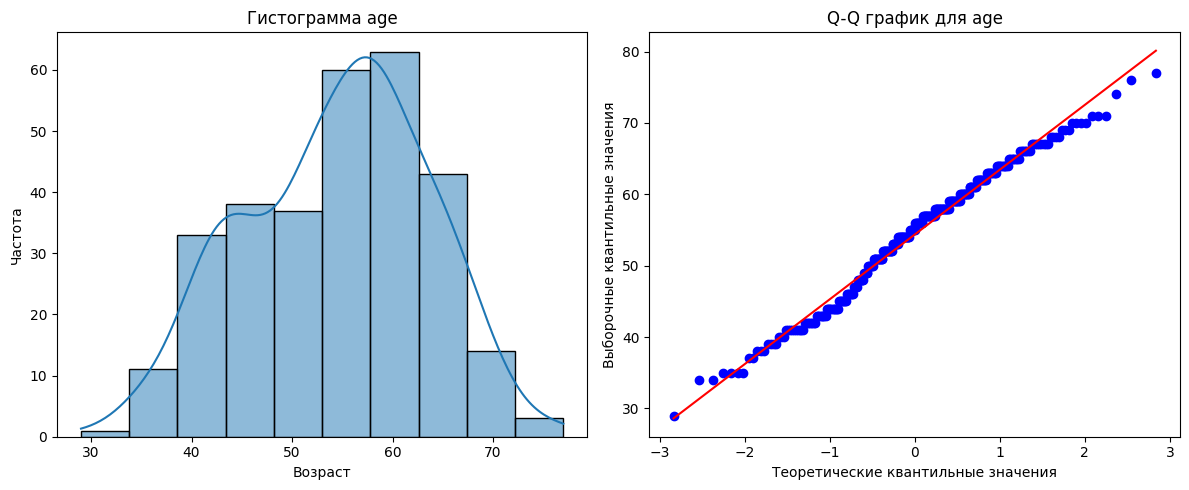

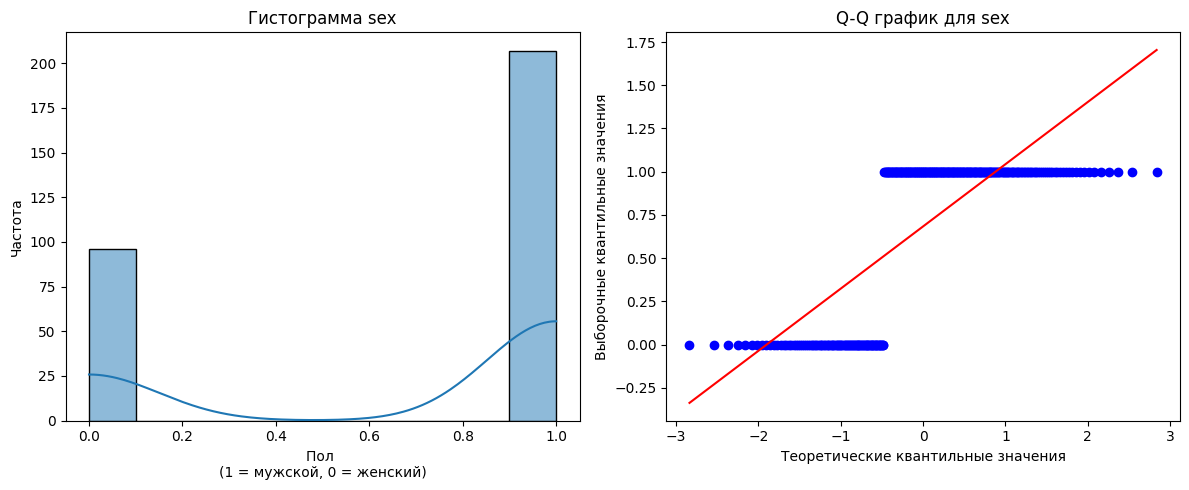

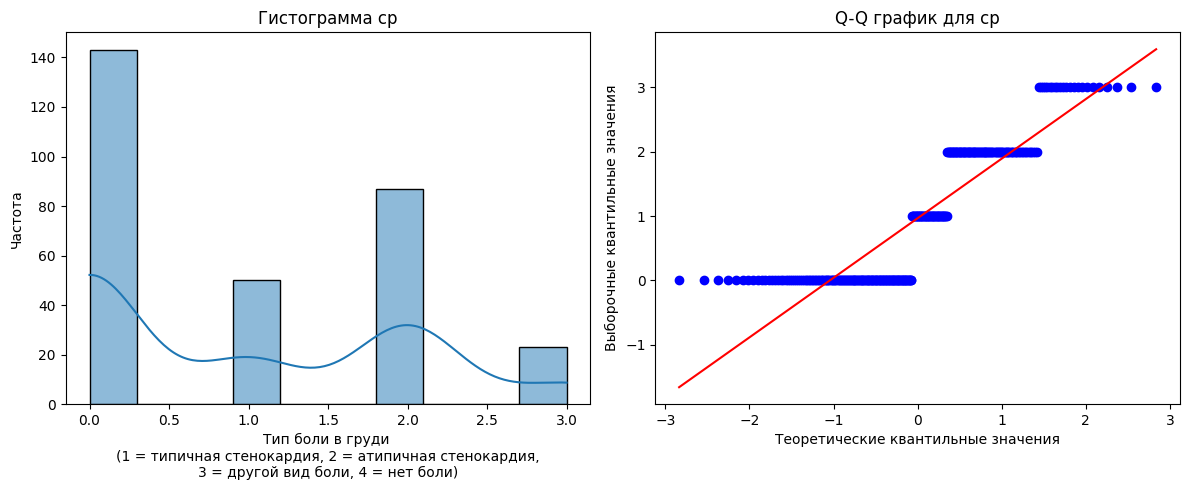

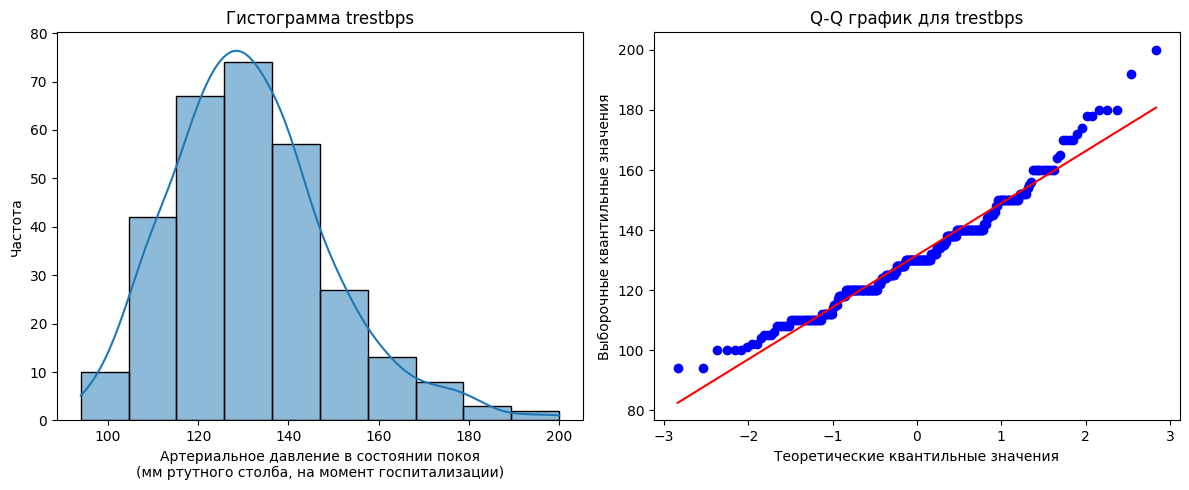

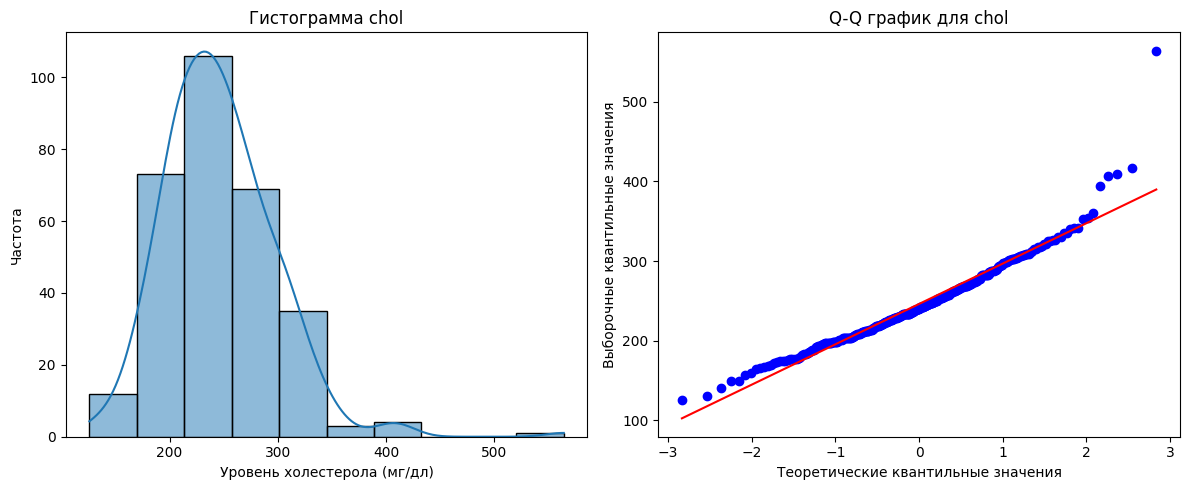

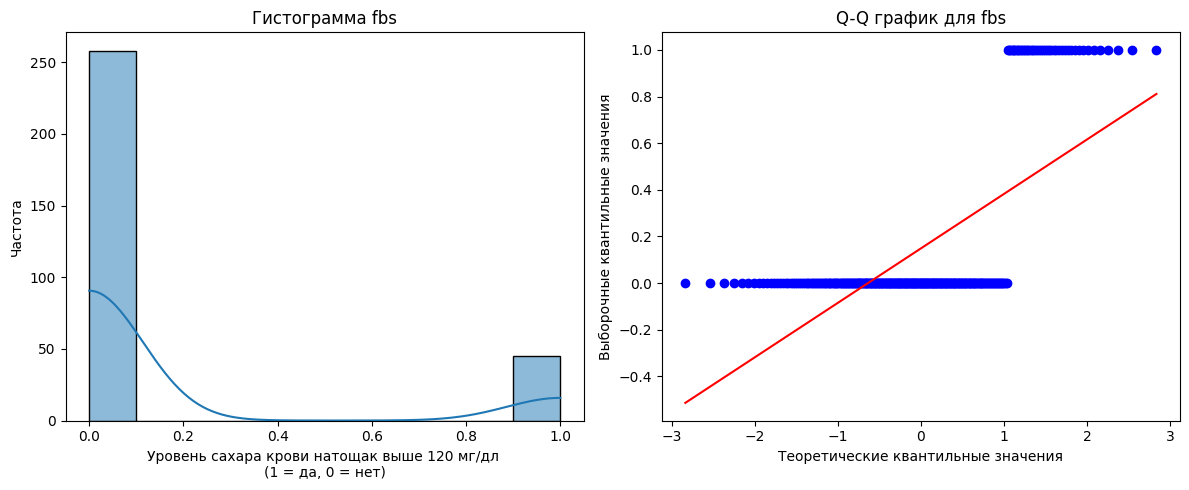

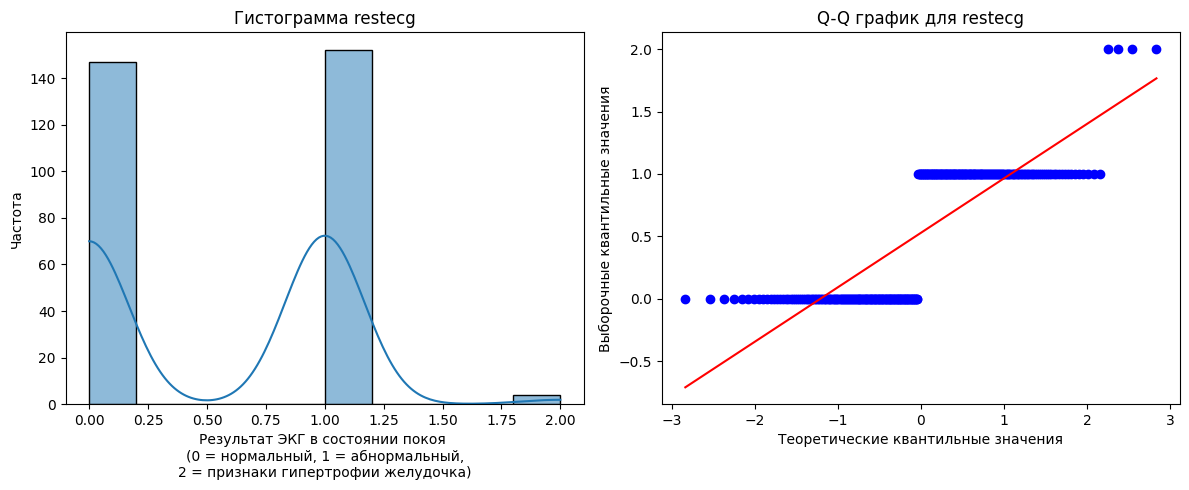

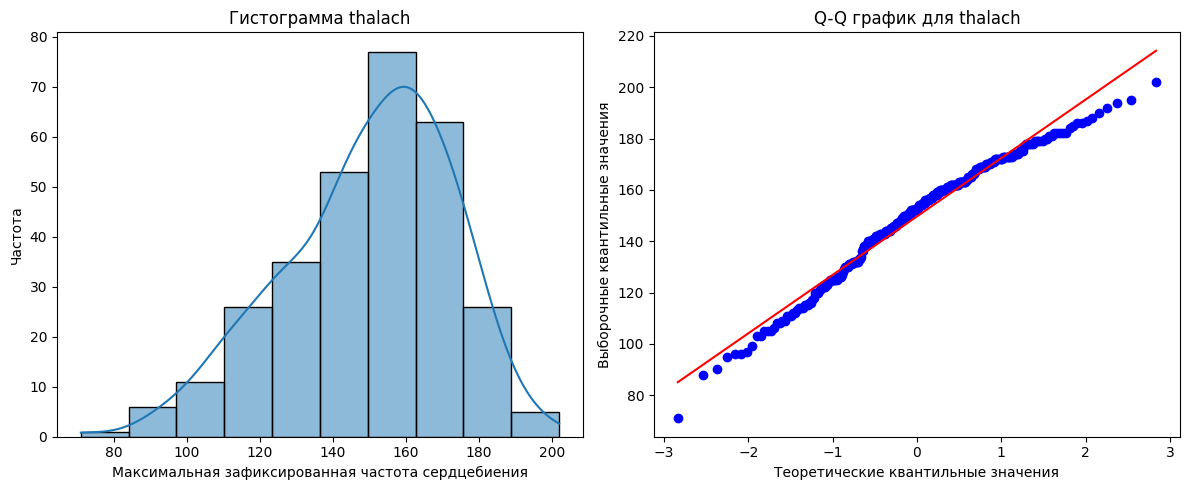

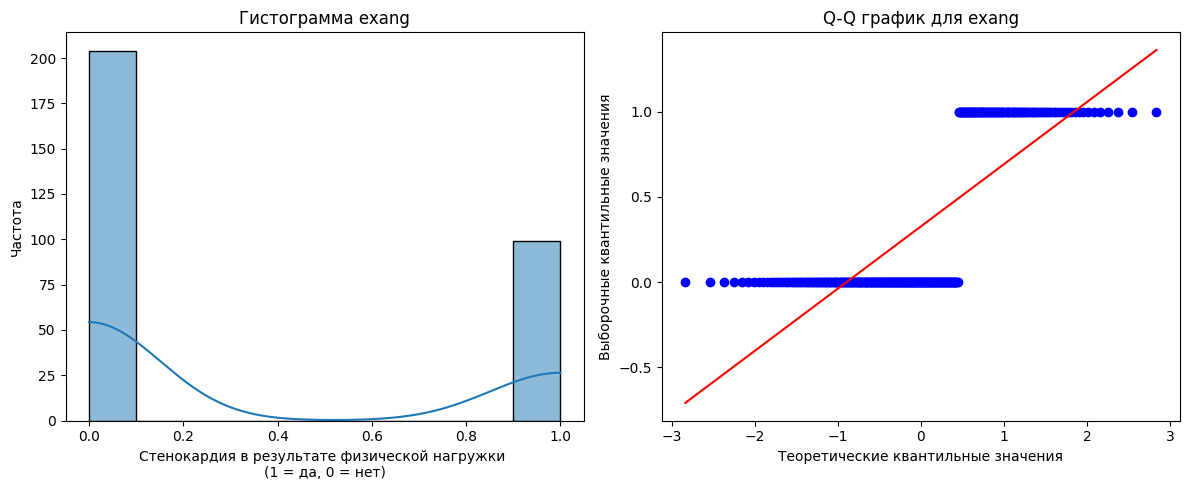

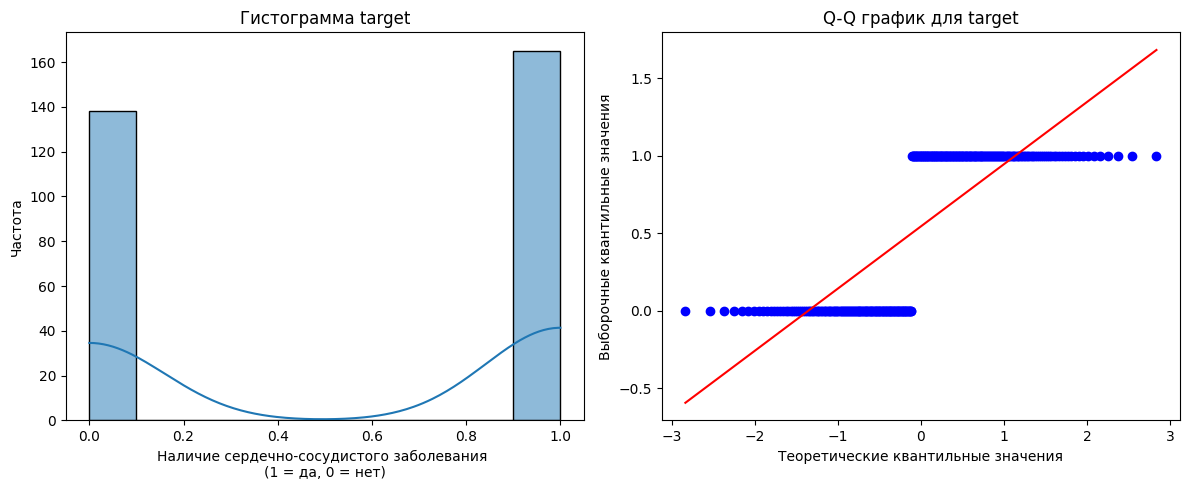

In [25]:
descriptions = {
    'age': '–í–æ–∑—Ä–∞—Å—Ç',
    'sex': '–ü–æ–ª \n(1 = –º—É–∂—Å–∫–æ–π, 0 = –∂–µ–Ω—Å–∫–∏–π)',
    'cp': '–¢–∏–ø –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ \n(1 = —Ç–∏–ø–∏—á–Ω–∞—è —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, 2 = –∞—Ç–∏–ø–∏—á–Ω–∞—è —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è,\n3 = –¥—Ä—É–≥–æ–π –≤–∏–¥ –±–æ–ª–∏, 4 = –Ω–µ—Ç –±–æ–ª–∏)',
    'trestbps': '–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–µ –¥–∞–≤–ª–µ–Ω–∏–µ –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –ø–æ–∫–æ—è\n(–º–º —Ä—Ç—É—Ç–Ω–æ–≥–æ —Å—Ç–æ–ª–±–∞, –Ω–∞ –º–æ–º–µ–Ω—Ç –≥–æ—Å–ø–∏—Ç–∞–ª–∏–∑–∞—Ü–∏–∏)',
    'chol': '–£—Ä–æ–≤–µ–Ω—å —Ö–æ–ª–µ—Å—Ç–µ—Ä–æ–ª–∞ (–º–≥/–¥–ª)',
    'fbs': '–£—Ä–æ–≤–µ–Ω—å —Å–∞—Ö–∞—Ä–∞ –∫—Ä–æ–≤–∏ –Ω–∞—Ç–æ—â–∞–∫ –≤—ã—à–µ 120 –º–≥/–¥–ª \n(1 = –¥–∞, 0 = –Ω–µ—Ç)',
    'restecg': '–†–µ–∑—É–ª—å—Ç–∞—Ç –≠–ö–ì –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –ø–æ–∫–æ—è \n(0 = –Ω–æ—Ä–º–∞–ª—å–Ω—ã–π, 1 = –∞–±–Ω–æ—Ä–º–∞–ª—å–Ω—ã–π,\n2 = –ø—Ä–∏–∑–Ω–∞–∫–∏ –≥–∏–ø–µ—Ä—Ç—Ä–æ—Ñ–∏–∏ –∂–µ–ª—É–¥–æ—á–∫–∞)',
    'thalach': '–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–∞—è —á–∞—Å—Ç–æ—Ç–∞ —Å–µ—Ä–¥—Ü–µ–±–∏–µ–Ω–∏—è',
    'exang': '–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –Ω–∞–≥—Ä—É–∂–∫–∏ \n(1 = –¥–∞, 0 = –Ω–µ—Ç)',
    'target': '–ù–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç–æ–≥–æ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è \n(1 = –¥–∞, 0 = –Ω–µ—Ç)'
}

for _,column in enumerate(data.columns):
    plt.figure(figsize=(12, 5))
    
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, bins='sturges')
    plt.title(f'–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ {column}')
    plt.xlabel(descriptions[column])
    plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞') 
    
    plt.subplot(1, 2, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'Q-Q –≥—Ä–∞—Ñ–∏–∫ –¥–ª—è {column}')
    plt.xlabel('–¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–µ –∫–≤–∞–Ω—Ç–∏–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')  
    plt.ylabel('–í—ã–±–æ—Ä–æ—á–Ω—ã–µ –∫–≤–∞–Ω—Ç–∏–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')  
    
    plt.tight_layout()
    plt.show()

### –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –º–µ—Ç–æ–¥

#### –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞

**–û–ø–∏—Å–∞–Ω–∏–µ:**
–¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ (Shapiro-Wilk test) –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑—ã –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö. –û–Ω —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω –¥–ª—è –Ω–µ–±–æ–ª—å—à–∏—Ö –≤—ã–±–æ—Ä–æ–∫, –Ω–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–∏–º–µ–Ω–µ–Ω –∏ –¥–ª—è –±–æ–ª–µ–µ –∫—Ä—É–ø–Ω—ã—Ö –Ω–∞–±–æ—Ä–æ–≤ –¥–∞–Ω–Ω—ã—Ö.

**–ì–∏–ø–æ—Ç–µ–∑—ã:**
* –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H0): –î–∞–Ω–Ω—ã–µ –∏–º–µ—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.
* –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H1): –î–∞–Ω–Ω—ã–µ –Ω–µ –∏–º–µ—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

**–†–µ–∑—É–ª—å—Ç–∞—Ç—ã:**
–¢–µ—Å—Ç –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É —Ç–µ—Å—Ç–∞ –∏ p-value.
* –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Ç–µ—Å—Ç–∞: –ß–µ–º –±–ª–∏–∂–µ –∫ 1, —Ç–µ–º –±–æ–ª–µ–µ –≤–µ—Ä–æ—è—Ç–Ω–æ, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã.
* p-value: –ï—Å–ª–∏ p-value –º–µ–Ω—å—à–µ –∑–∞—Ä–∞–Ω–µ–µ —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ (–æ–±—ã—á–Ω–æ 0.05), –º—ã –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –∏ –¥–µ–ª–∞–µ–º –≤—ã–≤–æ–¥, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –Ω–µ –∏–º–µ—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

#### –¢–µ—Å—Ç –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞
**–û–ø–∏—Å–∞–Ω–∏–µ:**
–¢–µ—Å—Ç –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ (Kolmogorov-Smirnov test) –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏ —Å –∑–∞–¥–∞–Ω–Ω—ã–º —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º, –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ ‚Äî –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º.

**–ì–∏–ø–æ—Ç–µ–∑—ã:**
* –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H0): –î–∞–Ω–Ω—ã–µ –∏–º–µ—é—Ç —É–∫–∞–∑–∞–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ).
* –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H1): –î–∞–Ω–Ω—ã–µ –Ω–µ –∏–º–µ—é—Ç —É–∫–∞–∑–∞–Ω–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

**–†–µ–∑—É–ª—å—Ç–∞—Ç—ã:**
–¢–µ—Å—Ç –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É —Ç–µ—Å—Ç–∞ –∏ p-value.
* –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Ç–µ—Å—Ç–∞: –≠—Ç–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –º–µ–∂–¥—É —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –∏ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.
* p-value: –ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ —Ç–µ—Å—Ç—É –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞, –µ—Å–ª–∏ p-value –º–µ–Ω—å—à–µ 0.05, –º—ã –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –∏ –º–æ–∂–µ–º –∑–∞–∫–ª—é—á–∏—Ç—å, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –Ω–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é.

In [26]:
statistic_results = []

for column in data.columns:
    shapiro_test = stats.shapiro(data[column])
    
    kstest = stats.kstest(data[column], 'norm', args=(np.mean(data[column]), np.std(data[column])))
    
    statistic_results.append({
        '–ê—Ç—Ç—Ä–∏–±—É—Ç': column,
        '–®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞': shapiro_test.statistic,
        '–®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ p-value': shapiro_test.pvalue,
        '–ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞': kstest.statistic,
        '–ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ p-value': kstest.pvalue,
        '–®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å': shapiro_test.pvalue >= ALPHA,  
        '–ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å': kstest.pvalue >= ALPHA,
        'p_value_bounf': ALPHA,
    })

stat_res = pd.DataFrame(statistic_results)
stat_res

–ê—Ç—Ç—Ä–∏–±—É—Ç  –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞  –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ p-value  \
0       age                 0.986370          5.798359e-03   
1       sex                 0.585730          2.750712e-26   
2        cp                 0.790159          1.857152e-19   
3  trestbps                 0.965918          1.458097e-06   
4      chol                 0.946882          5.364847e-09   
5       fbs                 0.423987          5.430898e-30   
6   restecg                 0.679316          1.378110e-23   
7   thalach                 0.976315          6.620820e-05   
8     exang                 0.591264          3.846846e-26   
9    target                 0.633594          5.667296e-25   

   –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞  –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ p-value  \
0                         0.076315                  5.562192e-02   
1                         0.435234                  1.023878e-52   
2                         0.297957                  2.405773e-24   
3                         0.101664                  3.524286e-03   
4                         0.055380                  2.995070e-01   
5                         0.513378                  1.170274e-74   
6                         0.330515                  5.400830e-30   
7                         0.071473                  8.615719e-02   
8                         0.430250                  1.810690e-51   
9                         0.364335                  1.489362e-36   

   –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å  –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å  p_value_bounf  
0                      False                               True           0.05  
1                      False                              False           0.05  
2                      False                              False           0.05  
3                      False                              False           0.05  
4                      False                               True           0.05  
5                      False                              False           0.05  
6                      False                              False           0.05  
7                      False                               True           0.05  
8                      False                              False           0.05  
9                      False                              False           0.05

### –ì—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–π –º–µ—Ç–æ–¥ —Å–æ–≤–º–µ—Å—Ç–Ω–æ —Å —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–º

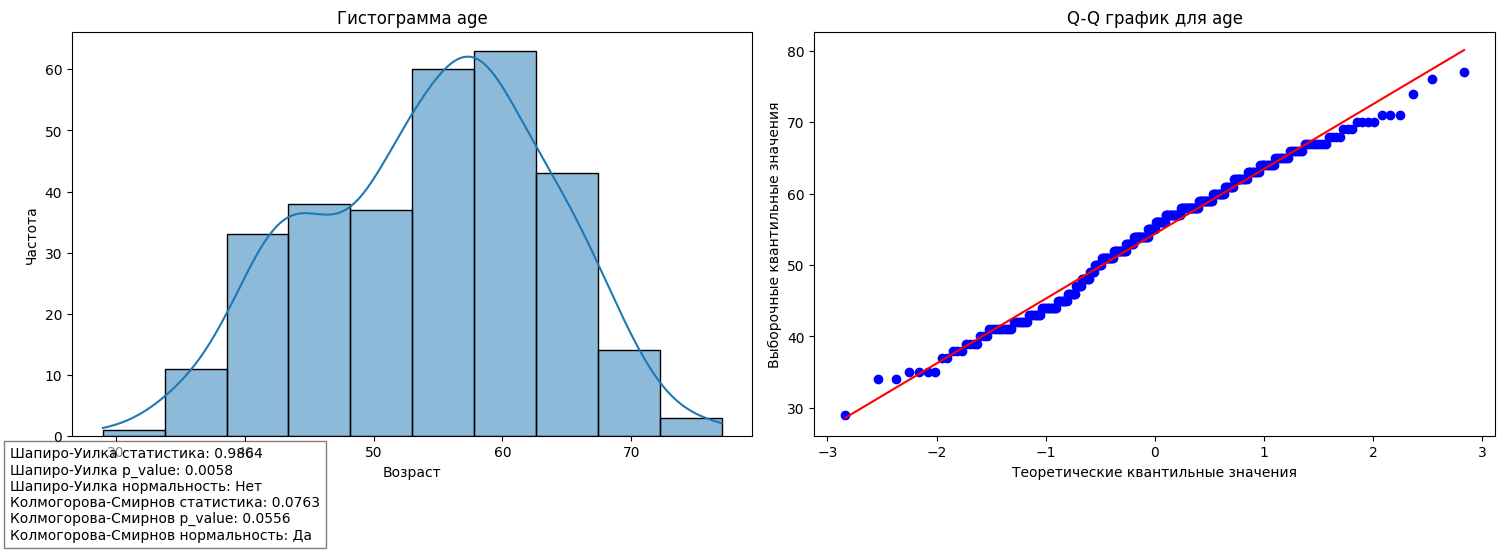

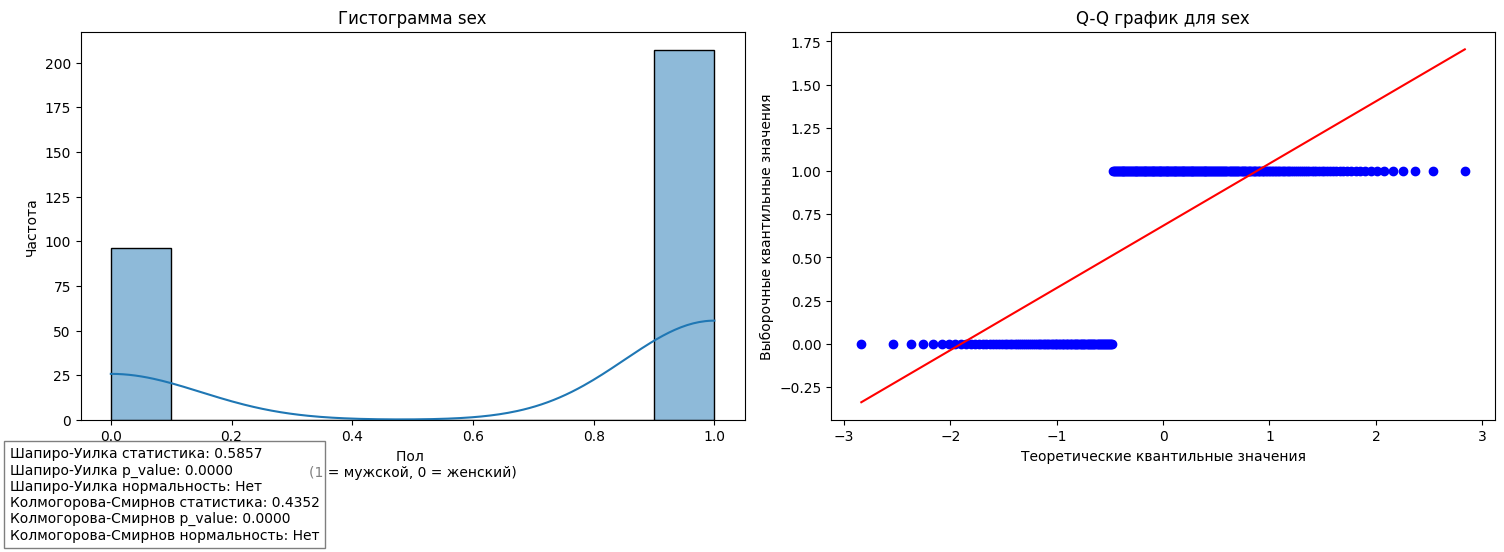

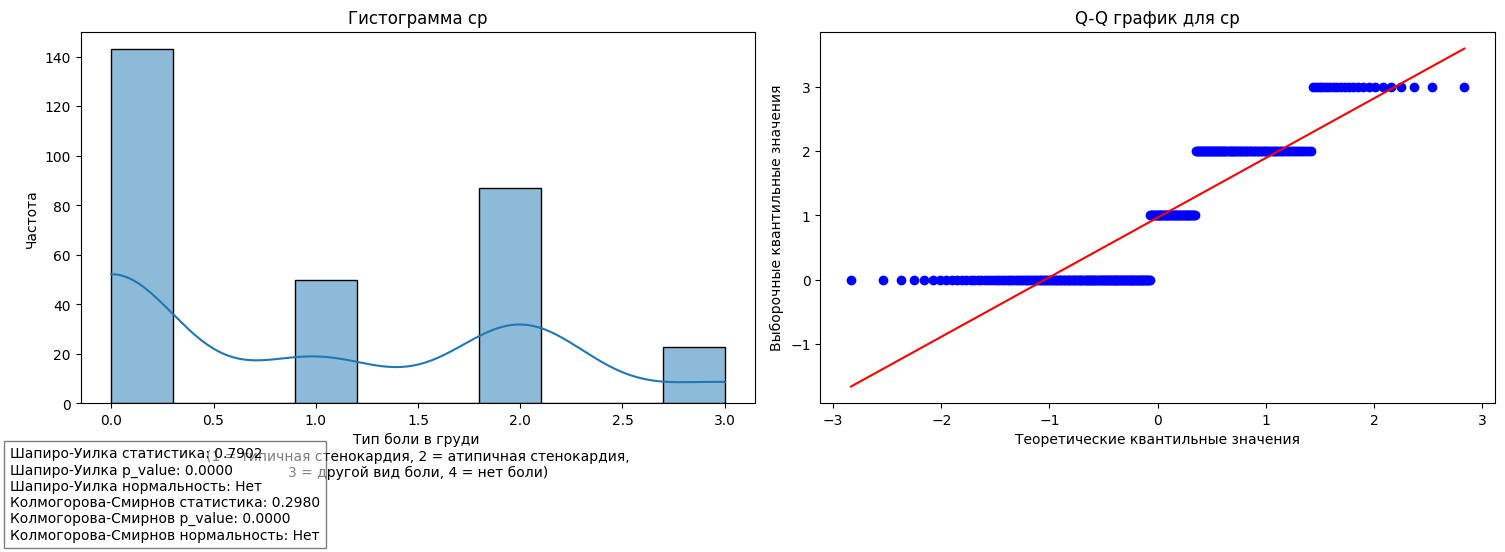

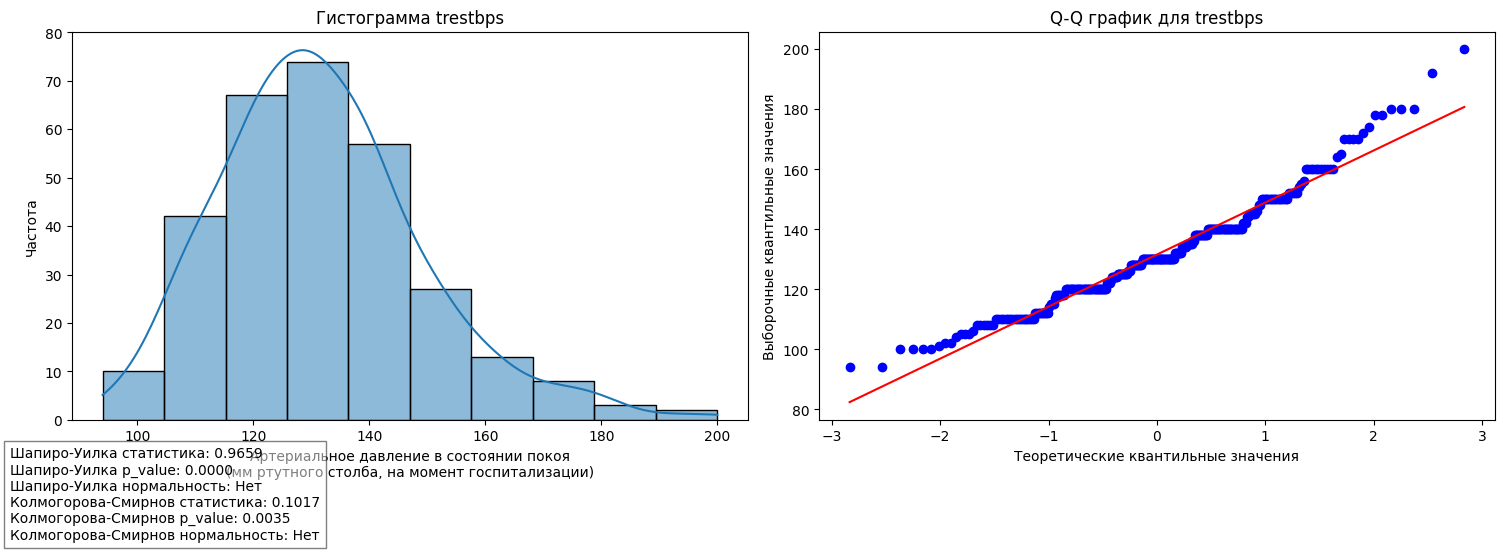

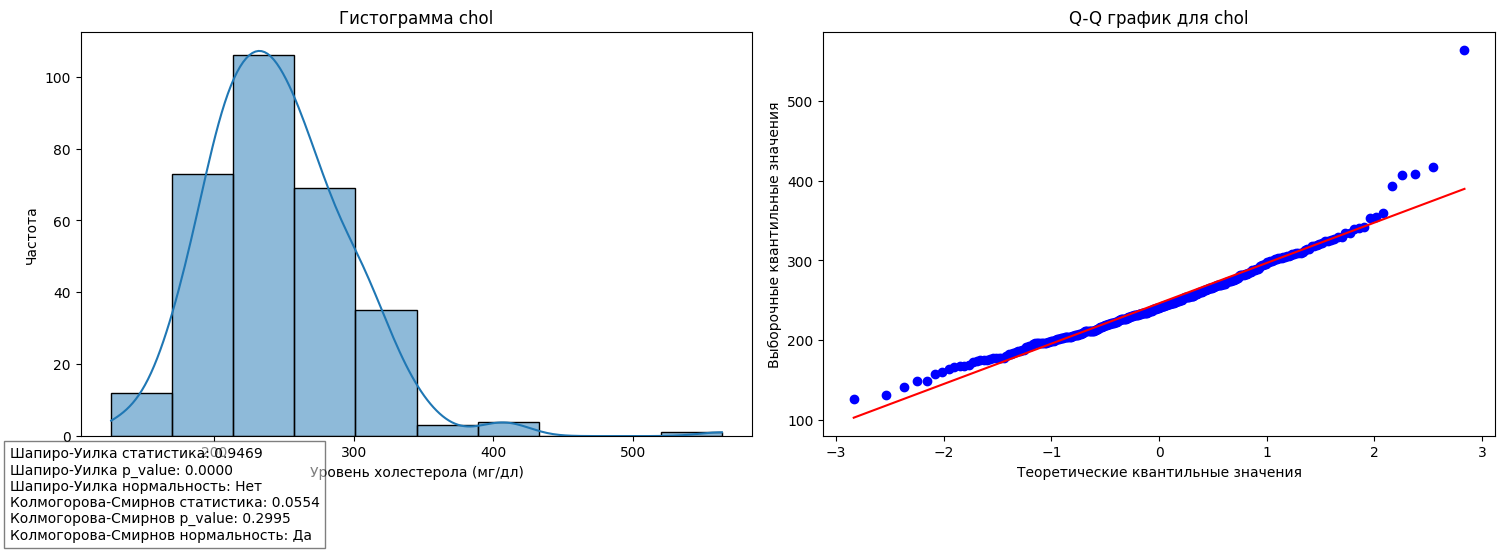

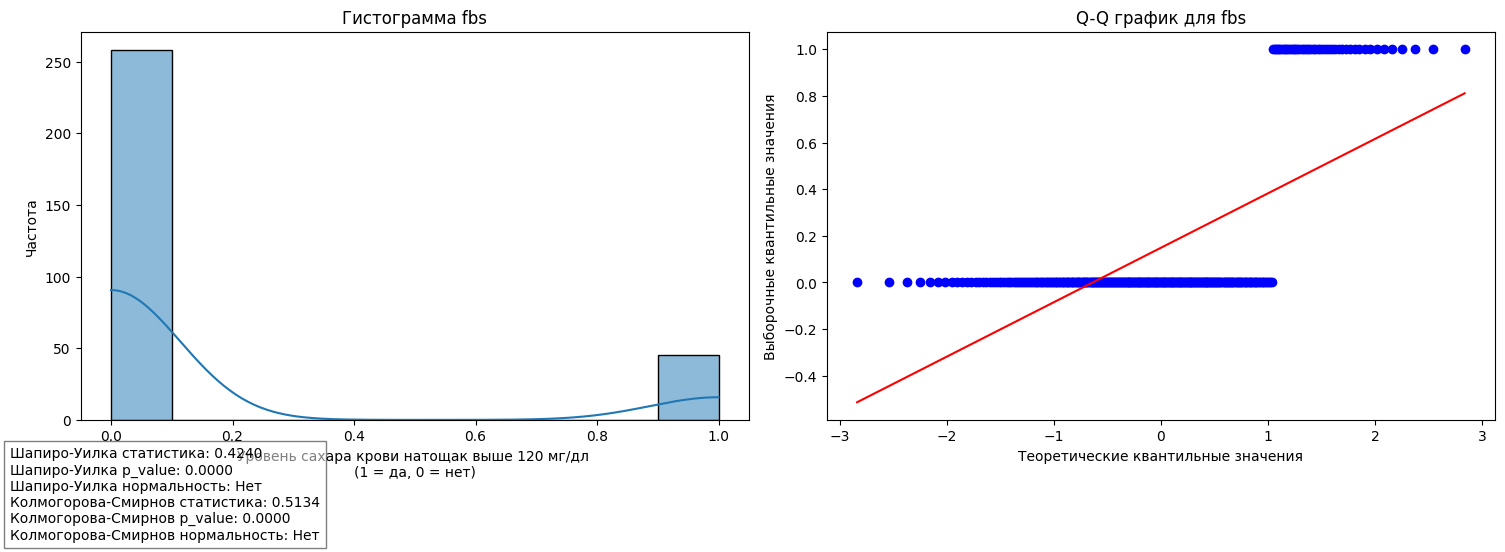

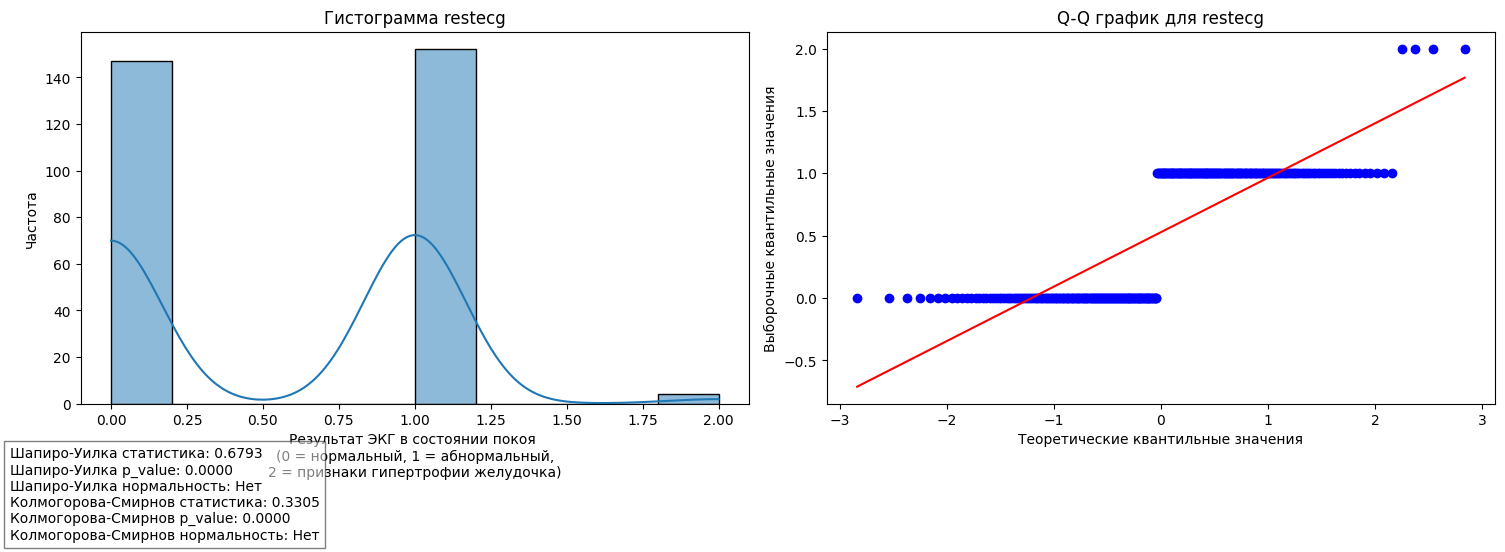

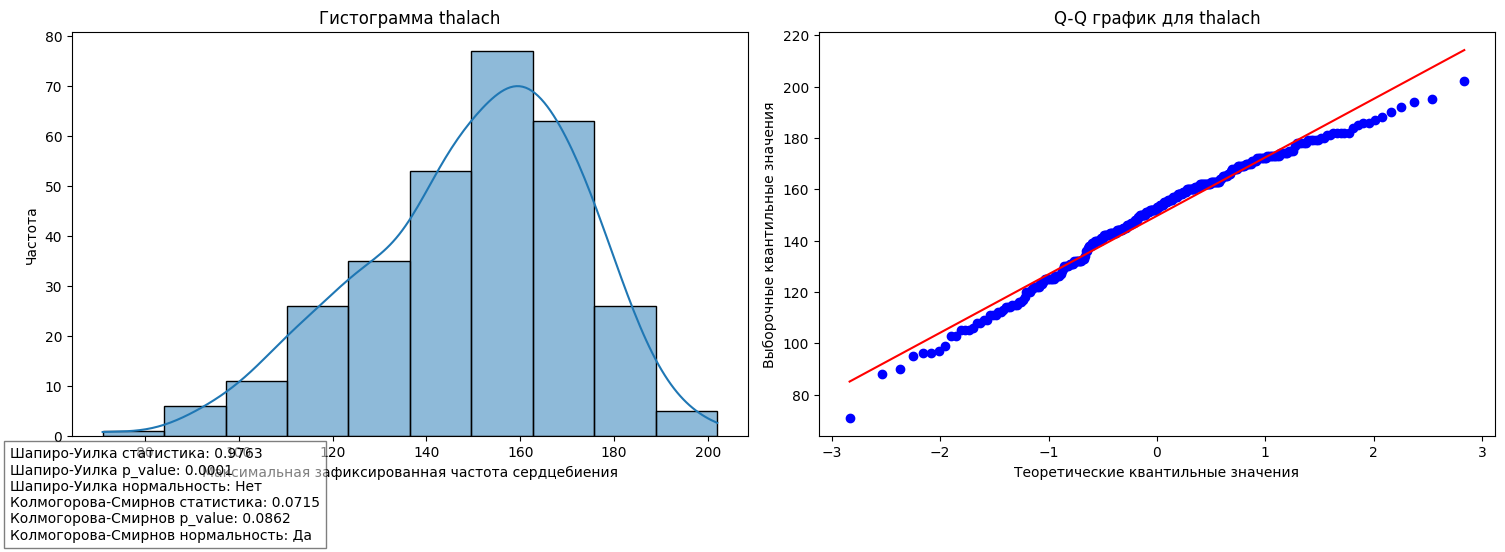

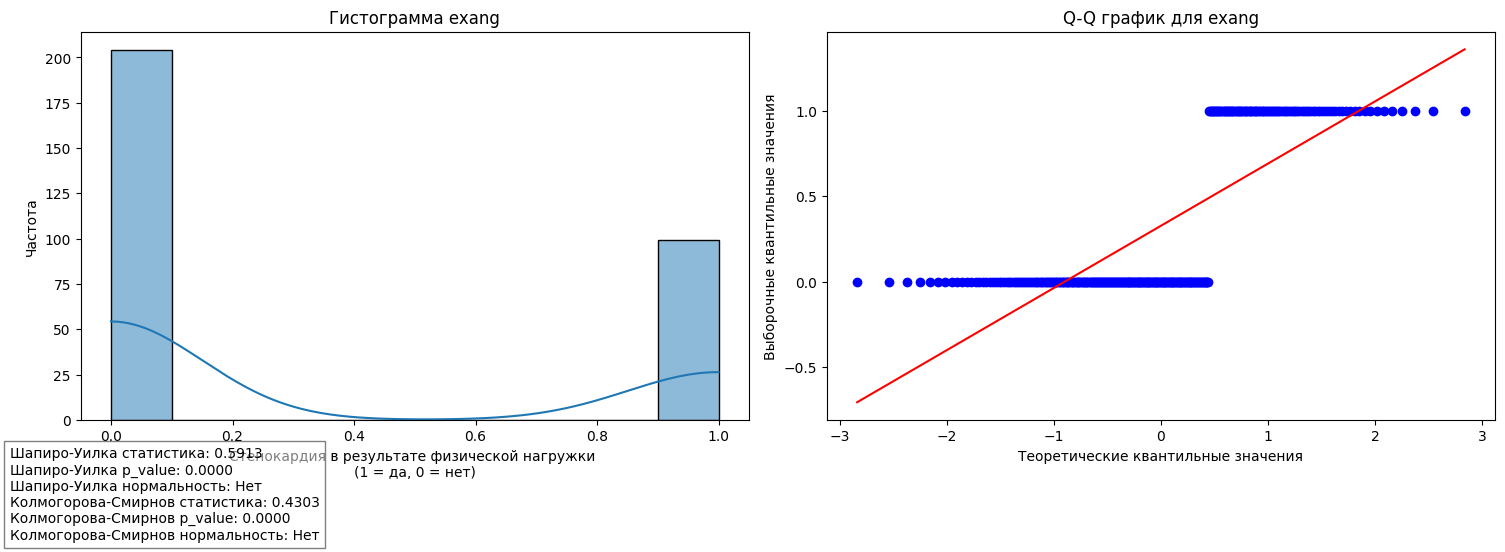

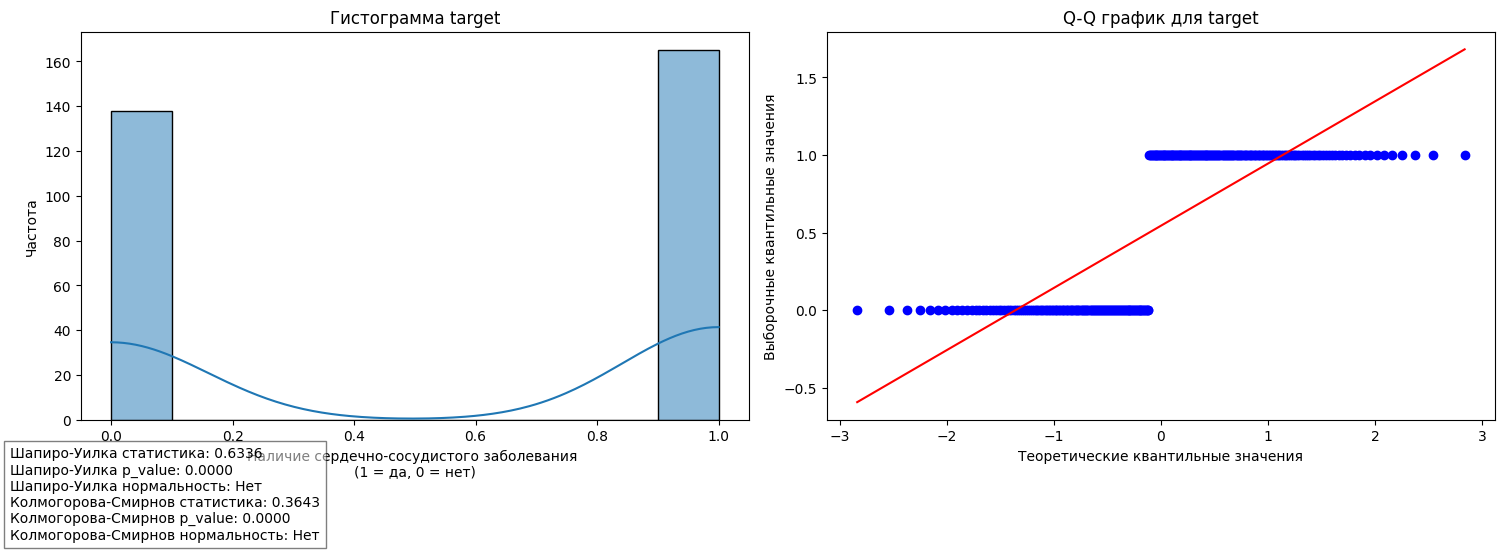

In [27]:
def create_statistic_descr(column):
    shapiro_value = stat_res.loc[stat_res['–ê—Ç—Ç—Ä–∏–±—É—Ç'] == column, '–®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞'].values[0]
    shapiro_p_value = stat_res.loc[stat_res['–ê—Ç—Ç—Ä–∏–±—É—Ç'] == column, '–®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ p-value'].values[0]
    shapiro_norm = stat_res.loc[stat_res['–ê—Ç—Ç—Ä–∏–±—É—Ç'] == column, '–®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å'].values[0]
    
    sk_value = stat_res.loc[stat_res['–ê—Ç—Ç—Ä–∏–±—É—Ç'] == column, '–ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞'].values[0]
    sk_p_value = stat_res.loc[stat_res['–ê—Ç—Ç—Ä–∏–±—É—Ç'] == column, '–ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ p-value'].values[0]
    sk_norm = stat_res.loc[stat_res['–ê—Ç—Ç—Ä–∏–±—É—Ç'] == column, '–ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å'].values[0]

    return f"\n".join((
        f'–®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {shapiro_value:.4f}',
        f'–®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ p_value: {shapiro_p_value:.4f}',
        f'–®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å: {'–î–∞' if shapiro_norm else '–ù–µ—Ç'}',
        f'–ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {sk_value:.4f}',
        f'–ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤ p_value: {sk_p_value:.4f}',
        f'–ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å: {'–î–∞' if sk_norm else '–ù–µ—Ç'}',
    ))


for _,column in enumerate(data.columns):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, bins='sturges')
    plt.title(f'–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ {column}')
    plt.xlabel(descriptions[column])
    plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    
    plt.subplot(1, 2, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'Q-Q –≥—Ä–∞—Ñ–∏–∫ –¥–ª—è {column}')
    plt.xlabel('–¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–µ –∫–≤–∞–Ω—Ç–∏–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')  
    plt.ylabel('–í—ã–±–æ—Ä–æ—á–Ω—ã–µ –∫–≤–∞–Ω—Ç–∏–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')  
    
    textstr = create_statistic_descr(column)
    plt.gcf().text(0, 0.0, textstr, ha='left', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
   
    plt.tight_layout()
    plt.show()


–í—ã–≤–µ–¥–µ–º –≥—Ä–∞—Ñ–∏–∫–∏ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º, Q-Q –≥—Ä–∞—Ñ–∏–∫ –∏ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö —Ç–µ—Å—Ç–æ–≤ –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –∏ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞

### –í—ã–≤–æ–¥—ã –æ –±–ª–∏–∑–æ—Å—Ç–∏ –≤—ã–±–æ—Ä–∫–∏ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–π

### –û–±—â–∏–µ –≤—ã–≤–æ–¥—ã

–¢–µ—Å—Ç—ã –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å:  
–®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –∏ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ ‚Äî –æ–±–∞ —Ç–µ—Å—Ç–∞ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑—ã –æ —Ç–æ–º, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ —Å–ª–µ–¥—É—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é. –ï—Å–ª–∏ p-value –º–µ–Ω—å—à–µ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ (–æ–±—ã—á–Ω–æ 0.05), —Ç–æ –≥–∏–ø–æ—Ç–µ–∑—É –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –æ—Ç–≤–µ—Ä–≥–∞—é—Ç.  
–í –≤–∞—à–µ–º —Å–ª—É—á–∞–µ, –¥–ª—è –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –∞—Ç—Ä–∏–±—É—Ç–æ–≤ (–∑–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º chol, thalach –∏ age –¥–ª—è –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞) –º—ã –º–æ–∂–µ–º —É—Ç–≤–µ—Ä–∂–¥–∞—Ç—å, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã (p-value < 0.05).  

### –ü–æ–¥—Ä–æ–±–Ω—ã–µ –≤—ã–≤–æ–¥—ã –ø–æ –∞—Ç—Ä–∏–±—É—Ç–∞–º  

1. –í–æ–∑—Ä–∞—Å—Ç (age):  
–®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞: –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = 0.986370, p-value = 0.005798 ‚Üí –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å **–æ—Ç–≤–µ—Ä–≥–Ω—É—Ç–∞**.  
–ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞: –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = 0.076315, p-value = 0.055621 ‚Üí –∑–¥–µ—Å—å –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å **–Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è**.  
–í—ã–≤–æ–¥: –•–æ—Ç—è —Ç–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å, —Ç–µ—Å—Ç –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –≤–æ–∑–º–æ–∂–Ω–æ–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é.  

2. –ü–æ–ª (sex):  
–û–±–∞ —Ç–µ—Å—Ç–∞ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã (p-value < 0.05).  
–í—ã–≤–æ–¥: –ê—Ç—Ä–∏–±—É—Ç sex –Ω–µ —Å–ª–µ–¥—É–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é.  

3. –¢–∏–ø –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ (cp):  
–û–±–∞ —Ç–µ—Å—Ç–∞ —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏.  
–í—ã–≤–æ–¥: –î–∞–Ω–Ω—ã–µ –ø–æ —ç—Ç–æ–º—É –∞—Ç—Ä–∏–±—É—Ç—É –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã.  

4. –ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–µ –¥–∞–≤–ª–µ–Ω–∏–µ (trestbps):  
–¢–µ—Å—Ç—ã –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã.  
–í—ã–≤–æ–¥: trestbps –Ω–µ —Å–ª–µ–¥—É–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é.  

5. –£—Ä–æ–≤–µ–Ω—å —Ö–æ–ª–µ—Å—Ç–µ—Ä–æ–ª–∞ (chol):  
–®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞: –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å, –Ω–æ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç.  
–í—ã–≤–æ–¥: –ù–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –≤–æ–∑–º–æ–∂–Ω–æ, –µ—Å—Ç—å —Å–º–µ—â–µ–Ω–∏–µ.  

6. –£—Ä–æ–≤–µ–Ω—å —Å–∞—Ö–∞—Ä–∞ –≤ –∫—Ä–æ–≤–∏ (fbs):  
–û–±–∞ —Ç–µ—Å—Ç–∞ –æ—Ç–≤–µ—Ä–≥–∞—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å.  
–í—ã–≤–æ–¥: fbs –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω.  

7. –†–µ–∑—É–ª—å—Ç–∞—Ç –≠–ö–ì –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –ø–æ–∫–æ—è (restecg):  
–û–±–∞ —Ç–µ—Å—Ç–∞ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã.  
–í—ã–≤–æ–¥: restecg –Ω–µ —Å–ª–µ–¥—É–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é.  

8. –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–∞—è —á–∞—Å—Ç–æ—Ç–∞ —Å–µ—Ä–¥—Ü–µ–±–∏–µ–Ω–∏—è (thalach):  
–®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å, –Ω–æ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞ –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç.  
–í—ã–≤–æ–¥: –í–æ–∑–º–æ–∂–Ω–æ, –µ—Å—Ç—å –∫–∞–∫–æ–µ-—Ç–æ —Å–º–µ—â–µ–Ω–∏–µ, –Ω–æ –≤ —Ü–µ–ª–æ–º –¥–∞–Ω–Ω—ã–µ –Ω–µ —Å–∏–ª—å–Ω–æ –æ—Ç–∫–ª–æ–Ω—è—é—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ.  

9. –°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –Ω–∞–≥—Ä—É–∑–∫–∏ (exang):  
–û–±–∞ —Ç–µ—Å—Ç–∞ –æ—Ç–≤–µ—Ä–≥–∞—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å.  
–í—ã–≤–æ–¥: exang –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω.  

10. –ù–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç–æ–≥–æ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è (target):  
–û–±–∞ —Ç–µ—Å—Ç–∞ –æ—Ç–≤–µ—Ä–≥–∞—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å.  
–í—ã–≤–æ–¥: target —Ç–∞–∫–∂–µ –Ω–µ —Å–ª–µ–¥—É–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é.

## –ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π —Å –ø–æ–º–æ—â—å—é —Ç–∞–±–ª–∏—Ü —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏

### –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏

In [28]:
variable_pairs = [
    ('sex', 'cp'),            # –ü–æ–ª –∏ —Ç–∏–ø –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏
    ('sex', 'target'),        # –ü–æ–ª –∏ –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π
    ('cp', 'target'),         # –¢–∏–ø –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ –∏ –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π
    ('fbs', 'target'),        # –£—Ä–æ–≤–µ–Ω—å —Å–∞—Ö–∞—Ä–∞ –≤ –∫—Ä–æ–≤–∏ –Ω–∞—Ç–æ—â–∞–∫ –∏ –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π
    ('restecg', 'target'),    # –†–µ–∑—É–ª—å—Ç–∞—Ç –≠–ö–ì –∏ –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π
    ('exang', 'target'),      # –°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –Ω–∞–≥—Ä—É–∑–∫–∏ –∏ –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π
]

tables = []
for var1, var2 in variable_pairs:
    contingency_table = pd.crosstab(data[var1], data[var2], margins=True)
    print(f'–¢–∞–±–ª–∏—Ü–∞ —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏ –¥–ª—è {var1} –∏ {var2}:')
    print(contingency_table)
    print('\n' + '-' * 50 + '\n')
    tables.append(contingency_table)

–¢–∞–±–ª–∏—Ü–∞ —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏ –¥–ª—è sex –∏ cp:
cp     0   1   2   3  All
sex                      
0     39  18  35   4   96
1    104  32  52  19  207
All  143  50  87  23  303

--------------------------------------------------

–¢–∞–±–ª–∏—Ü–∞ —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏ –¥–ª—è sex –∏ target:
target    0    1  All
sex                  
0        24   72   96
1       114   93  207
All     138  165  303

--------------------------------------------------

–¢–∞–±–ª–∏—Ü–∞ —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏ –¥–ª—è cp –∏ target:
target    0    1  All
cp                   
0       104   39  143
1         9   41   50
2        18   69   87
3         7   16   23
All     138  165  303

--------------------------------------------------

–¢–∞–±–ª–∏—Ü–∞ —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏ –¥–ª—è fbs –∏ target:
target    0    1  All
fbs                  
0       116  142  258
1        22   23   45
All     138  165  303

--------------------------------------------------

–¢–∞–±–ª–∏—Ü–∞ —Å–æ–ø—Ä—è–∂–µ–Ω–Ω

### –ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã –ø–æ —Ç–∞–±–ª–∏—Ü–∞–º —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏

1. –ü–æ–ª (sex) –∏ —Ç–∏–ø –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ (cp)  
–ú—É–∂—á–∏–Ω—ã (1) —á–∞—â–µ, —á–µ–º –∂–µ–Ω—â–∏–Ω—ã (0), –∏–º–µ—é—Ç —Ç–∏–ø–∏—á–Ω—É—é —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—é (—Ç–∏–ø 1) –∏ –∞—Ç–∏–ø–∏—á–Ω—É—é —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—é (—Ç–∏–ø 2).  
–ñ–µ–Ω—â–∏–Ω—ã —á–∞—â–µ –∏–º–µ—é—Ç —Ç–∏–ø –±–æ–ª–∏ "–¥—Ä—É–≥–æ–π –≤–∏–¥" (—Ç–∏–ø 2) –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –º—É–∂—á–∏–Ω–∞–º–∏.  
2. –ü–æ–ª (sex) –∏ –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π (target)  
–í –≤—ã–±–æ—Ä–∫–µ –±–æ–ª—å—à–µ –º—É–∂—á–∏–Ω, —á–µ–º –∂–µ–Ω—â–∏–Ω, —É –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è (165 —É –º—É–∂—á–∏–Ω –ø—Ä–æ—Ç–∏–≤ 72 —É –∂–µ–Ω—â–∏–Ω).  
3. –¢–∏–ø –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ (cp) –∏ –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π (target)  
–ù–∞–∏–±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–∞–ª–∏—á–∏—è —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —É –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤ —Å —Ç–∏–ø–æ–º –±–æ–ª–∏ 2 (69 —Å–ª—É—á–∞–µ–≤).  
4. –£—Ä–æ–≤–µ–Ω—å —Å–∞—Ö–∞—Ä–∞ –≤ –∫—Ä–æ–≤–∏ (fbs) –∏ –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π (target)  
–£ –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤ —Å –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —É—Ä–æ–≤–Ω–µ–º —Å–∞—Ö–∞—Ä–∞ (0) –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª—å—à–µ —Å–ª—É—á–∞–µ–≤ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π (142 —Å–ª—É—á–∞—è).  
5. –†–µ–∑—É–ª—å—Ç–∞—Ç –≠–ö–ì (restecg) –∏ –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π (target)  
–ü–∞—Ü–∏–µ–Ω—Ç—ã —Å –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º –≠–ö–ì –∏–º–µ—é—Ç –º–µ–Ω—å—à–µ —Å–ª—É—á–∞–µ–≤ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π, —á–µ–º –ø–∞—Ü–∏–µ–Ω—Ç—ã —Å –∞–Ω–æ–º–∞–ª—å–Ω—ã–º–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏.  
6. –°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –Ω–∞–≥—Ä—É–∑–∫–∏ (exang) –∏ –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π (target)  
–ü–∞—Ü–∏–µ–Ω—Ç—ã, —É –∫–æ—Ç–æ—Ä—ã—Ö —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –ø—Ä–∏ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –Ω–∞–≥—Ä—É–∑–∫–µ (1), —Ä–µ–∂–µ –∏–º–µ—é—Ç —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è (76 —Å–ª—É—á–∞–µ–≤ –ø—Ä–æ—Ç–∏–≤ 23 –±–µ–∑ —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏–∏).  

### –ê–Ω–∞–ª–∏–∑ —Ç–∞–±–ª–∏—Ü —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏ —Å –ø–æ–º–æ—â—å—é –∫—Ä–∏—Ç–µ—Ä–∏—è –•–∏-–∫–≤–∞–¥—Ä–∞—Ç

In [29]:
from scipy.stats import chi2_contingency

chi2_results = []

for i, (var1, var2) in enumerate(variable_pairs):
    chi2, p, dof, expected = chi2_contingency(tables[i])
    
    chi2_results.append({
        '–ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è 1': var1,
        '–ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è 2': var2,
        '–•–∏-–∫–≤–∞–¥—Ä–∞—Ç': chi2,
        'p-value': p,
        'p-value bound': ALPHA,
        '–°—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã (dof)': dof,
        '–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å': p < ALPHA, 
    })
chi2_df = pd.DataFrame(chi2_results)
chi2_df

–ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è 1 –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è 2  –•–∏-–∫–≤–∞–¥—Ä–∞—Ç       p-value  p-value bound  \
0          sex           cp    6.822076  5.559456e-01           0.05   
1          sex       target   23.914384  8.309376e-05           0.05   
2           cp       target   81.686428  2.236129e-14           0.05   
3          fbs       target    0.238329  9.934395e-01           0.05   
4      restecg       target   10.023092  1.236829e-01           0.05   
5        exang       target   57.799295  8.408308e-12           0.05   

   –°—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã (dof)  –ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å  
0                      8           False  
1                      4            True  
2                      8            True  
3                      4           False  
4                      6           False  
5                      4            True

### –í—ã–≤–æ–¥—ã –æ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—è—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø–æ —Ç–∞–±–ª–∏—Ü–∞–º —Å–æ–ø—Ä—è–∂–µ–Ω–Ω—ã—Ö

1. –ü–æ–ª (sex) –∏ —Ç–∏–ø –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ (cp):  
–•–∏-–∫–≤–∞–¥—Ä–∞—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 6.8221  
p-value:               0.5559  
–í—ã–≤–æ–¥: –ù–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π —Å–≤—è–∑–∏ –º–µ–∂–¥—É –ø–æ–ª–æ–º –ø–∞—Ü–∏–µ–Ω—Ç–∞ –∏ —Ç–∏–ø–æ–º –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏. –≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ —Ç–∏–ø –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—ë–Ω –æ–¥–∏–Ω–∞–∫–æ–≤–æ —Å—Ä–µ–¥–∏ –º—É–∂—á–∏–Ω –∏ –∂–µ–Ω—â–∏–Ω, –∏ –ø–æ–ª –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Ñ–∞–∫—Ç–æ—Ä–æ–º, –≤–ª–∏—è—é—â–∏–º –Ω–∞ —ç—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä.  

2. –ü–æ–ª (sex) –∏ –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π (target):  
–•–∏-–∫–≤–∞–¥—Ä–∞—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 23.9144  
p-value:               0.0001  
–í—ã–≤–æ–¥: –ï—Å—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É –ø–æ–ª–æ–º –ø–∞—Ü–∏–µ–Ω—Ç–∞ –∏ –Ω–∞–ª–∏—á–∏–µ–º —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π. –≠—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Ç–æ, —á—Ç–æ –º—É–∂—á–∏–Ω—ã –∏ –∂–µ–Ω—â–∏–Ω—ã –∏–º–µ—é—Ç —Ä–∞–∑–ª–∏—á–Ω—É—é –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –∑–∞–±–æ–ª–µ—Ç—å —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã–º–∏ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è–º–∏, —á—Ç–æ —Ç—Ä–µ–±—É–µ—Ç –±–æ–ª–µ–µ –≥–ª—É–±–æ–∫–æ–≥–æ –∏–∑—É—á–µ–Ω–∏—è.  

3. –¢–∏–ø –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ (cp) –∏ –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π (target):  
–•–∏-–∫–≤–∞–¥—Ä–∞—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 81.6864  
p-value:               0.0000  
–í—ã–≤–æ–¥: –ï—Å—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É —Ç–∏–ø–æ–º –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ –∏ –Ω–∞–ª–∏—á–∏–µ–º —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π. –≠—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ —Ç–æ–º, —á—Ç–æ —Ä–∞–∑–Ω—ã–µ —Ç–∏–ø—ã –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ —Å–≤—è–∑–∞–Ω—ã —Å —Ä–∞–∑–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –Ω–∞–ª–∏—á–∏—è –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π. –ù–∞–ø—Ä–∏–º–µ—Ä, –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã–µ —Ç–∏–ø—ã –±–æ–ª–∏ –º–æ–≥—É—Ç –±—ã—Ç—å —Å–∏–ª—å–Ω—ã–º–∏ –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–∞–º–∏ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π —Å–µ—Ä–¥—Ü–∞.  

4. –£—Ä–æ–≤–µ–Ω—å —Å–∞—Ö–∞—Ä–∞ –≤ –∫—Ä–æ–≤–∏ –Ω–∞—Ç–æ—â–∞–∫ (fbs) –∏ –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π (target):  
–•–∏-–∫–≤–∞–¥—Ä–∞—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 0.2383  
p-value:               0.9934  
–í—ã–≤–æ–¥: –ù–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π —Å–≤—è–∑–∏ –º–µ–∂–¥—É —É—Ä–æ–≤–Ω–µ–º —Å–∞—Ö–∞—Ä–∞ –≤ –∫—Ä–æ–≤–∏ –Ω–∞—Ç–æ—â–∞–∫ –∏ –Ω–∞–ª–∏—á–∏–µ–º —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π. –≠—Ç–æ –º–æ–∂–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ –≤—ã—Å–æ–∫–∏–π —É—Ä–æ–≤–µ–Ω—å —Å–∞—Ö–∞—Ä–∞ (fbs) –≤ —ç—Ç–æ–π –≤—ã–±–æ—Ä–∫–µ –Ω–µ —Å–≤—è–∑–∞–Ω —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –Ω–∞–ª–∏—á–∏—è —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π.  

5. –†–µ–∑—É–ª—å—Ç–∞—Ç –≠–ö–ì –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –ø–æ–∫–æ—è (restecg) –∏ –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π (target):  
–•–∏-–∫–≤–∞–¥—Ä–∞—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 10.0231  
p-value:               0.1237  
–í—ã–≤–æ–¥: –ù–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π —Å–≤—è–∑–∏ –º–µ–∂–¥—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º –≠–ö–ì –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –ø–æ–∫–æ—è –∏ –Ω–∞–ª–∏—á–∏–µ–º —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π. –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ —Ä–∞–∑–ª–∏—á–∏—è –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞—Ö –≠–ö–ì –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å –Ω–∞–ª–∏—á–∏–µ–º –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π.  

6. –°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –Ω–∞–≥—Ä—É–∑–∫–∏ (exang) –∏ –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π (target):  
–•–∏-–∫–≤–∞–¥—Ä–∞—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 57.7993  
p-value:               0.0000  
–í—ã–≤–æ–¥: –ï—Å—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É –Ω–∞–ª–∏—á–∏–µ–º —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏–∏ –ø—Ä–∏ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –Ω–∞–≥—Ä—É–∑–∫–µ –∏ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã–º–∏ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è–º–∏. –ü–∞—Ü–∏–µ–Ω—Ç—ã, –∏—Å–ø—ã—Ç—ã–≤–∞—é—â–∏–µ —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—é –≤–æ –≤—Ä–µ–º—è —Ñ–∏–∑–∏—á–µ—Å–∫–∏—Ö –Ω–∞–≥—Ä—É–∑–æ–∫, –≤–µ—Ä–æ—è—Ç–Ω–µ–µ —Å—Ç—Ä–∞–¥–∞—é—Ç –æ—Ç —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π.  

–û–±—â–∏–µ –≤—ã–≤–æ–¥—ã:  
–°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã –º–µ–∂–¥—É –ø–æ–ª–æ–º –∏ –Ω–∞–ª–∏—á–∏–µ–º —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π, —Ç–∏–ø–æ–º –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ –∏ –Ω–∞–ª–∏—á–∏–µ–º –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π, –∞ —Ç–∞–∫–∂–µ —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏–µ–π –ø—Ä–∏ –Ω–∞–≥—Ä—É–∑–∫–µ –∏ –Ω–∞–ª–∏—á–∏–µ–º –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π.  
–¢–∞–∫–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, –∫–∞–∫ —É—Ä–æ–≤–µ–Ω—å —Å–∞—Ö–∞—Ä–∞ –≤ –∫—Ä–æ–≤–∏ –Ω–∞—Ç–æ—â–∞–∫ (fbs) –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≠–ö–ì –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –ø–æ–∫–æ—è (restecg), –Ω–µ –ø–æ–∫–∞–∑–∞–ª–∏ –∑–Ω–∞—á–∏–º–æ–π —Å–≤—è–∑–∏ —Å –Ω–∞–ª–∏—á–∏–µ–º —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Ç–æ, —á—Ç–æ –≤ –¥–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –æ–Ω–∏ –Ω–µ –∏–≥—Ä–∞—é—Ç –∑–Ω–∞—á–∏–º–æ–π —Ä–æ–ª–∏ –≤ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–∏ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è.  

## –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –∞—Ç—Ç—Ä–∏–±—É—Ç–∞–º–∏

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è –¥–ª—è –∏–∑–º–µ—Ä–µ–Ω–∏—è —Å–∏–ª—ã –∏ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏. –í –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–∏–ø–∞ –¥–∞–Ω–Ω—ã—Ö –≤—ã–±–∏—Ä–∞—é—Ç—Å—è —Ä–∞–∑–Ω—ã–µ –º–µ—Ç–æ–¥—ã –∞–Ω–∞–ª–∏–∑–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏:

–î–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:  
1. –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞, –µ—Å–ª–∏ –¥–∞–Ω–Ω—ã–µ –∏–º–µ—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–ª–µ–Ω–∏–µ  
2. –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –°–ø–∏—Ä–º–µ–Ω–∞, –µ—Å–ª–∏ –¥–∞–Ω–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–Ω—ã –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ  
–î–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:  
–ê–Ω–∞–ª–∏–∑ —Å–≤—è–∑–∏ –º–æ–∂–Ω–æ –≤—ã–ø–æ–ª–Ω–∏—Ç—å —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ö—Ä–∞–º–µ—Ä–∞ V.  

### –ü—Ä–æ–≤–µ–¥–µ–º –∞–Ω–∞–ª–∏–∑:
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞ –∏ –°–ø–∏—Ä–º–µ–Ω–∞ –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö  
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ö—Ä–∞–º–µ—Ä–∞ V –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö  

#### –ß–∏—Å–ª–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ

In [30]:
quant_columns = ['age', 'trestbps', 'chol', 'thalach', 'target']

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞

–≠—Ç–æ –º–µ—Ä–∞ –ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –¥–≤—É–º—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏. –û–Ω–∞ –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è –¥–ª—è –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –∏ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç -1 –¥–æ +1:  
* +1 –æ–∑–Ω–∞—á–∞–µ—Ç –∏–¥–µ–∞–ª—å–Ω—É—é –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é –ª–∏–Ω–µ–π–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å (–µ—Å–ª–∏ –æ–¥–Ω–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è, –¥—Ä—É–≥–∞—è —Ç–æ–∂–µ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ).  
* 0 –æ–∑–Ω–∞—á–∞–µ—Ç –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –ª–∏–Ω–µ–π–Ω–æ–π —Å–≤—è–∑–∏.  
* -1 –æ–∑–Ω–∞—á–∞–µ—Ç –∏–¥–µ–∞–ª—å–Ω—É—é –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—É—é –ª–∏–Ω–µ–π–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å (–µ—Å–ª–∏ –æ–¥–Ω–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è, –¥—Ä—É–≥–∞—è —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è).  

–§–æ—Ä–º—É–ª–∞ –¥–ª—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞ ùëü:  
$r = \frac{\sum(x_i-\hat x)(y_i - \hat y)}{\sqrt{\sum( (x_i -\hat x)^2) \sum( (y_i - \hat y)^2)}}$  
–≥–¥–µ $x_i, y_i$ - –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –∞ $\hat x, \hat y$ - —Å—Ä–µ–¥–Ω–∏–µ  

In [31]:
pearson_corr = data[quant_columns].corr(method='pearson')
pearson_corr

age  trestbps      chol   thalach    target
age       1.000000  0.279351  0.213678 -0.398522 -0.225439
trestbps  0.279351  1.000000  0.123174 -0.046698 -0.144931
chol      0.213678  0.123174  1.000000 -0.009940 -0.085239
thalach  -0.398522 -0.046698 -0.009940  1.000000  0.421741
target   -0.225439 -0.144931 -0.085239  0.421741  1.000000

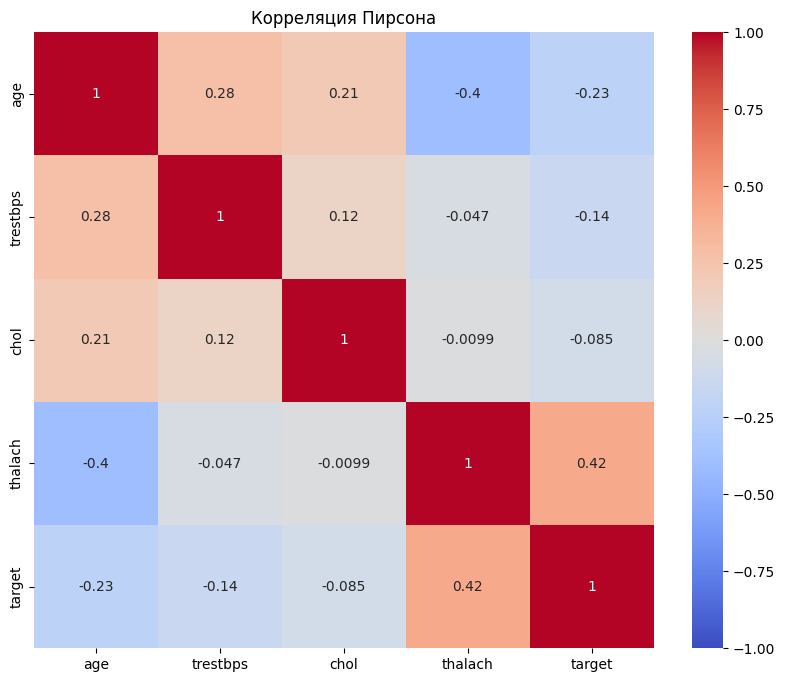

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞')
plt.show()

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–µ–Ω–∞

–§–æ—Ä–º—É–ª–∞:  
$
\rho = 1 - \frac{6 \times \sum d_{i}^2}{n(n^2 - 1)}
$  
–≥–¥–µ $d_i$ ‚Äî —Ä–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–¥—É —Ä–∞–Ω–≥–∞–º–∏ –∫–∞–∂–¥–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, $n$ ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π.  
–°–ø–∏—Ä–º–µ–Ω –Ω–µ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç –ª–∏–Ω–µ–π–Ω–æ—Å—Ç–∏ —Å–≤—è–∑–∏, –æ–Ω –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç —Ç–æ–ª—å–∫–æ –º–æ–Ω–æ—Ç–æ–Ω–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫—É—é, —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—É—é –∏–ª–∏ —Å—Ç–µ–ø–µ–Ω–Ω—É—é).  

–ü–æ–¥—Å—á–µ—Ç —Ä–∞–Ω–≥–æ–≤:  
1. –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞:
–°–Ω–∞—á–∞–ª–∞ –∑–Ω–∞—á–µ–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —Å–æ—Ä—Ç–∏—Ä—É—é—Ç—Å—è –ø–æ –≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏—é (–∏–ª–∏ —É–±—ã–≤–∞–Ω–∏—é).

2. –ü—Ä–∏—Å–≤–æ–µ–Ω–∏–µ —Ä–∞–Ω–≥–æ–≤:
–ù–∞–∏–º–µ–Ω—å—à–µ–º—É –∑–Ω–∞—á–µ–Ω–∏—é –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ—Ç—Å—è —Ä–∞–Ω–≥ 1, —Å–ª–µ–¥—É—é—â–µ–º—É –∑–∞ –Ω–∏–º ‚Äî —Ä–∞–Ω–≥ 2, –∏ —Ç–∞–∫ –¥–∞–ª–µ–µ.

3. –û–¥–∏–Ω–∞–∫–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (—Å–≤—è–∑–∞–Ω–Ω—ã–µ —Ä–∞–Ω–≥–∏):
–ï—Å–ª–∏ –≤ –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (—Å–≤—è–∑–∞–Ω–Ω—ã–µ —Ä–∞–Ω–≥–∏), –∏–º –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ—Ç—Å—è —Å—Ä–µ–¥–Ω–∏–π —Ä–∞–Ω–≥, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –∏—Ö –ø–æ–∑–∏—Ü–∏–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ –¥–≤–∞ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–Ω–∏–º–∞—é—Ç 3-–µ –∏ 4-–µ –º–µ—Å—Ç–∞ –≤ –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–º —Å–ø–∏—Å–∫–µ, –æ–Ω–∏ –ø–æ–ª—É—á–∞—Ç —Å—Ä–µ–¥–Ω–∏–π —Ä–∞–Ω–≥ (3 + 4)/2 = 3.5

In [33]:
correlation_matrix = pd.DataFrame(index=quant_columns, columns=quant_columns)

for var1 in quant_columns:
    for var2 in quant_columns:
        if var1 != var2:
            corr, p_value = spearmanr(data[var1], data[var2])
            correlation_matrix.loc[var1, var2] = '–∑–Ω–∞—á–∏–º–∞' if p_value < ALPHA else '–Ω–µ –∑–Ω–∞—á–∏–º–∞'

spearman_corr = data[quant_columns].corr(method='spearman')
spearman_corr

age  trestbps      chol   thalach    target
age       1.000000  0.285617  0.195786 -0.398052 -0.238400
trestbps  0.285617  1.000000  0.126562 -0.040407 -0.121593
chol      0.195786  0.126562  1.000000 -0.046766 -0.120888
thalach  -0.398052 -0.040407 -0.046766  1.000000  0.428370
target   -0.238400 -0.121593 -0.120888  0.428370  1.000000

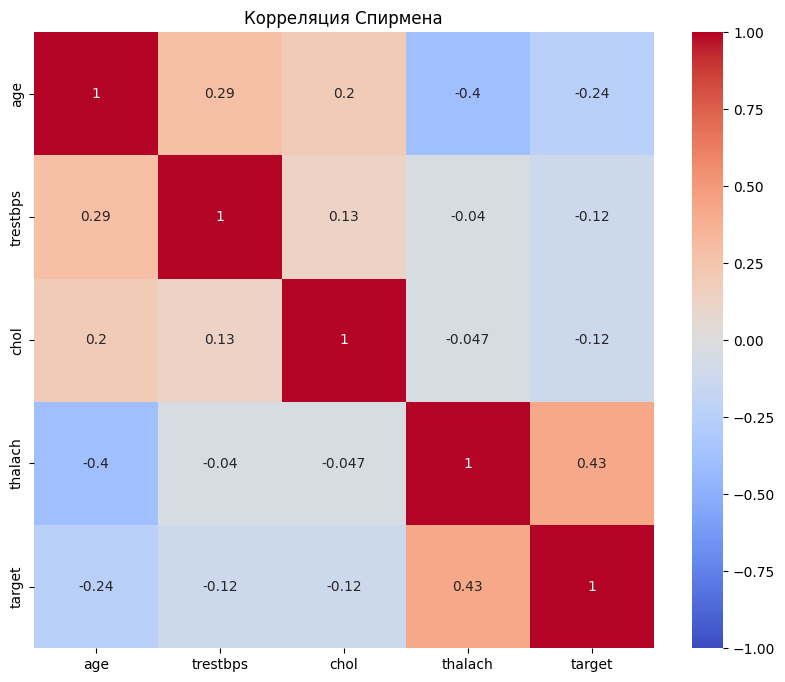

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–µ–Ω–∞')
plt.show()

#### –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

In [35]:
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'target']

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ö—Ä–∞–º–µ—Ä–∞ V –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

In [36]:
def cramers_v_with_significance(confusion_matrix):
    chi2, p_value, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
    return cramers_v, p_value

cramers_v_matrix = pd.DataFrame(index=cat_columns, columns=cat_columns)
cramers_p_value_matrix = pd.DataFrame(index=cat_columns, columns=cat_columns)

for col1 in cat_columns:
    for col2 in cat_columns:
        if col1 != col2:
            contingency_table = pd.crosstab(data[col1], data[col2])
            v, p = cramers_v_with_significance(contingency_table)
            
            cramers_v_matrix.loc[col1, col2] = v
            cramers_p_value_matrix.loc[col1, col2] = f'–∑–Ω–∞—á–∏–º–∞' if p < ALPHA else f'–Ω–µ –∑–Ω–∞—á–∏–º–∞'
        else:
            cramers_v_matrix.loc[col1, col2] = np.nan

cramers_v_matrix = cramers_v_matrix.astype(float)

cramers_v_matrix


sex        cp       fbs   restecg     exang    target
sex           NaN  0.150050  0.035058  0.110464  0.134101  0.273814
cp       0.150050       NaN  0.113242  0.126437  0.471457  0.519223
fbs      0.035058  0.113242       NaN  0.087068  0.015771  0.018728
restecg  0.110464  0.126437  0.087068       NaN  0.099106  0.181878
exang    0.134101  0.471457  0.015771  0.099106       NaN  0.429692
target   0.273814  0.519223  0.018728  0.181878  0.429692       NaN

### –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞

–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∞—Ç—Ç—Ä–∏–±—É—Ç—ã

In [37]:
cramers_p_value_matrix

sex          cp         fbs     restecg       exang  \
sex             NaN  –Ω–µ –∑–Ω–∞—á–∏–º–∞  –Ω–µ –∑–Ω–∞—á–∏–º–∞  –Ω–µ –∑–Ω–∞—á–∏–º–∞     –∑–Ω–∞—á–∏–º–∞   
cp       –Ω–µ –∑–Ω–∞—á–∏–º–∞         NaN  –Ω–µ –∑–Ω–∞—á–∏–º–∞  –Ω–µ –∑–Ω–∞—á–∏–º–∞     –∑–Ω–∞—á–∏–º–∞   
fbs      –Ω–µ –∑–Ω–∞—á–∏–º–∞  –Ω–µ –∑–Ω–∞—á–∏–º–∞         NaN  –Ω–µ –∑–Ω–∞—á–∏–º–∞  –Ω–µ –∑–Ω–∞—á–∏–º–∞   
restecg  –Ω–µ –∑–Ω–∞—á–∏–º–∞  –Ω–µ –∑–Ω–∞—á–∏–º–∞  –Ω–µ –∑–Ω–∞—á–∏–º–∞         NaN  –Ω–µ –∑–Ω–∞—á–∏–º–∞   
exang       –∑–Ω–∞—á–∏–º–∞     –∑–Ω–∞—á–∏–º–∞  –Ω–µ –∑–Ω–∞—á–∏–º–∞  –Ω–µ –∑–Ω–∞—á–∏–º–∞         NaN   
target      –∑–Ω–∞—á–∏–º–∞     –∑–Ω–∞—á–∏–º–∞  –Ω–µ –∑–Ω–∞—á–∏–º–∞     –∑–Ω–∞—á–∏–º–∞     –∑–Ω–∞—á–∏–º–∞   

             target  
sex         –∑–Ω–∞—á–∏–º–∞  
cp          –∑–Ω–∞—á–∏–º–∞  
fbs      –Ω–µ –∑–Ω–∞—á–∏–º–∞  
restecg     –∑–Ω–∞—á–∏–º–∞  
exang       –∑–Ω–∞—á–∏–º–∞  
target          NaN

–ß–∏—Å–ª–æ–≤—ã–µ –∞—Ç—Ç—Ä–∏–±—É—Ç—ã

In [38]:
correlation_matrix

age    trestbps        chol     thalach   target
age           NaN     –∑–Ω–∞—á–∏–º–∞     –∑–Ω–∞—á–∏–º–∞     –∑–Ω–∞—á–∏–º–∞  –∑–Ω–∞—á–∏–º–∞
trestbps  –∑–Ω–∞—á–∏–º–∞         NaN     –∑–Ω–∞—á–∏–º–∞  –Ω–µ –∑–Ω–∞—á–∏–º–∞  –∑–Ω–∞—á–∏–º–∞
chol      –∑–Ω–∞—á–∏–º–∞     –∑–Ω–∞—á–∏–º–∞         NaN  –Ω–µ –∑–Ω–∞—á–∏–º–∞  –∑–Ω–∞—á–∏–º–∞
thalach   –∑–Ω–∞—á–∏–º–∞  –Ω–µ –∑–Ω–∞—á–∏–º–∞  –Ω–µ –∑–Ω–∞—á–∏–º–∞         NaN  –∑–Ω–∞—á–∏–º–∞
target    –∑–Ω–∞—á–∏–º–∞     –∑–Ω–∞—á–∏–º–∞     –∑–Ω–∞—á–∏–º–∞     –∑–Ω–∞—á–∏–º–∞      NaN

**–í—ã–≤–æ–¥—ã –æ –∑–Ω–∞—á–∏–º—ã—Ö –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è—Ö:**

1. –í–æ–∑—Ä–∞—Å—Ç (age) –∏ –∞—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–µ –¥–∞–≤–ª–µ–Ω–∏–µ –≤ –ø–æ–∫–æ–µ (trestbps)  
   –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: 0.286  
   –í—ã–≤–æ–¥: –°—É—â–µ—Å—Ç–≤—É–µ—Ç —Å–ª–∞–±–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É –≤–æ–∑—Ä–∞—Å—Ç–æ–º –∏ –∞—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω—ã–º –¥–∞–≤–ª–µ–Ω–∏–µ–º –≤ –ø–æ–∫–æ–µ. –≠—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –≤–æ–∑—Ä–∞—Å—Ç–∞ –∞—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–µ –¥–∞–≤–ª–µ–Ω–∏–µ –≤ –ø–æ–∫–æ–µ –∏–º–µ–µ—Ç —Ç–µ–Ω–¥–µ–Ω—Ü–∏—é –∫ –ø–æ–≤—ã—à–µ–Ω–∏—é.

2. –í–æ–∑—Ä–∞—Å—Ç (age) –∏ —É—Ä–æ–≤–µ–Ω—å —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞ (chol)  
   –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: 0.196  
   –í—ã–≤–æ–¥: –°—É—â–µ—Å—Ç–≤—É–µ—Ç —Å–ª–∞–±–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É –≤–æ–∑—Ä–∞—Å—Ç–æ–º –∏ —É—Ä–æ–≤–Ω–µ–º —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞, —á—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –Ω–µ–±–æ–ª—å—à–æ–π —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏ –∫ —Ä–æ—Å—Ç—É —É—Ä–æ–≤–Ω—è —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞ —Å –≤–æ–∑—Ä–∞—Å—Ç–æ–º.

3. –í–æ–∑—Ä–∞—Å—Ç (age) –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —á–∞—Å—Ç–æ—Ç–∞ —Å–µ—Ä–¥—Ü–µ–±–∏–µ–Ω–∏—è (thalach)  
   –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: -0.398  
   –í—ã–≤–æ–¥: –° —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –≤–æ–∑—Ä–∞—Å—Ç–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —á–∞—Å—Ç–æ—Ç–∞ —Å–µ—Ä–¥—Ü–µ–±–∏–µ–Ω–∏—è –∏–º–µ–µ—Ç —Ç–µ–Ω–¥–µ–Ω—Ü–∏—é –∫ —Å–Ω–∏–∂–µ–Ω–∏—é, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è —É–º–µ—Ä–µ–Ω–Ω–æ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π. –≠—Ç–æ –º–æ–∂–µ—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ–≤–∞—Ç—å –æ –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ–º —Å–Ω–∏–∂–µ–Ω–∏–∏ —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ —Å–µ—Ä–¥—Ü–∞ –∫ –≤—ã—Å–æ–∫–æ–π –Ω–∞–≥—Ä—É–∑–∫–µ —Å –≤–æ–∑—Ä–∞—Å—Ç–æ–º.

4. –í–æ–∑—Ä–∞—Å—Ç (age) –∏ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (target)  
   –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: -0.238  
   –í—ã–≤–æ–¥: –ú–µ–∂–¥—É –≤–æ–∑—Ä–∞—Å—Ç–æ–º –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (–Ω–∞–ø—Ä–∏–º–µ—Ä, –Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π) —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —É–º–µ—Ä–µ–Ω–Ω–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –±–æ–ª–µ–µ –Ω–∏–∑–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –≤–æ–∑—Ä–∞—Å—Ç–∞.

5. –ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–µ –¥–∞–≤–ª–µ–Ω–∏–µ –≤ –ø–æ–∫–æ–µ (trestbps) –∏ —É—Ä–æ–≤–µ–Ω—å —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞ (chol)  
   –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: 0.127  
   –í—ã–≤–æ–¥: –ú–µ–∂–¥—É –∞—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω—ã–º –¥–∞–≤–ª–µ–Ω–∏–µ–º –≤ –ø–æ–∫–æ–µ –∏ —É—Ä–æ–≤–Ω–µ–º —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —Å–ª–∞–±–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è. –≠—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –Ω–µ–±–æ–ª—å—à—É—é —Ç–µ–Ω–¥–µ–Ω—Ü–∏—é –∫ —É–≤–µ–ª–∏—á–µ–Ω–∏—é —É—Ä–æ–≤–Ω—è —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞ –ø—Ä–∏ –ø–æ–≤—ã—à–µ–Ω–∏–∏ –∞—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–≥–æ –¥–∞–≤–ª–µ–Ω–∏—è.

6. –ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–µ –¥–∞–≤–ª–µ–Ω–∏–µ –≤ –ø–æ–∫–æ–µ (trestbps) –∏ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (target)  
   –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: -0.122  
   –í—ã–≤–æ–¥: –°–ª–∞–±–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –∞—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω—ã–º –¥–∞–≤–ª–µ–Ω–∏–µ–º –≤ –ø–æ–∫–æ–µ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Ç–æ, —á—Ç–æ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –∞—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–≥–æ –¥–∞–≤–ª–µ–Ω–∏—è —Å–≤—è–∑–∞–Ω—ã —Å –±–æ–ª–µ–µ –Ω–∏–∑–∫–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

7. –£—Ä–æ–≤–µ–Ω—å —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞ (chol) –∏ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (target)  
   –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: -0.121  
   –í—ã–≤–æ–¥: –°–ª–∞–±–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É —É—Ä–æ–≤–Ω–µ–º —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —Ç–∞–∫–∂–µ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ —Ç–æ–º, —á—Ç–æ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞ –º–æ–≥—É—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω—ã —Å –±–æ–ª–µ–µ –Ω–∏–∑–∫–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

8. –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —á–∞—Å—Ç–æ—Ç–∞ —Å–µ—Ä–¥—Ü–µ–±–∏–µ–Ω–∏—è (thalach) –∏ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (target)  
   –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: 0.428  
   –í—ã–≤–æ–¥: –°—É—â–µ—Å—Ç–≤—É–µ—Ç —É–º–µ—Ä–µ–Ω–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π —á–∞—Å—Ç–æ—Ç–æ–π —Å–µ—Ä–¥—Ü–µ–±–∏–µ–Ω–∏—è –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Ç–µ–Ω–¥–µ–Ω—Ü–∏—é –∫ —É–≤–µ–ª–∏—á–µ–Ω–∏—é —á–∞—Å—Ç–æ—Ç—ã —Å–µ—Ä–¥—Ü–µ–±–∏–µ–Ω–∏—è —Å –ø–æ–≤—ã—à–µ–Ω–∏–µ–º –∑–Ω–∞—á–µ–Ω–∏–π —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

9. –ü–æ–ª (sex) –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —á–∞—Å—Ç–æ—Ç–∞ —Å–µ—Ä–¥—Ü–µ–±–∏–µ–Ω–∏—è (thalach)  
   –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: 0.134  
   –í—ã–≤–æ–¥: –°—É—â–µ—Å—Ç–≤—É–µ—Ç —Å–ª–∞–±–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É –ø–æ–ª–æ–º –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π —á–∞—Å—Ç–æ—Ç–æ–π —Å–µ—Ä–¥—Ü–µ–±–∏–µ–Ω–∏—è.

10. –ü–æ–ª (sex) –∏ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (target)  
    –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: 0.274  
    –í—ã–≤–æ–¥: –°—É—â–µ—Å—Ç–≤—É–µ—Ç —É–º–µ—Ä–µ–Ω–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É –ø–æ–ª–æ–º –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Ç–æ, —á—Ç–æ –ø–æ–ª –º–æ–∂–µ—Ç –≤–ª–∏—è—Ç—å –Ω–∞ —Ä–∏—Å–∫ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π.

11. –¢–∏–ø –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ (cp) –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —á–∞—Å—Ç–æ—Ç–∞ —Å–µ—Ä–¥—Ü–µ–±–∏–µ–Ω–∏—è (thalach)  
    –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: 0.471  
    –í—ã–≤–æ–¥: –°—É—â–µ—Å—Ç–≤—É–µ—Ç —Å–∏–ª—å–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É —Ç–∏–ø–æ–º –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π —á–∞—Å—Ç–æ—Ç–æ–π —Å–µ—Ä–¥—Ü–µ–±–∏–µ–Ω–∏—è, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Ç–æ, —á—Ç–æ —Ä–∞–∑–Ω—ã–µ —Ç–∏–ø—ã –±–æ–ª–∏ –º–æ–≥—É—Ç –ø–æ-—Ä–∞–∑–Ω–æ–º—É –≤–ª–∏—è—Ç—å –Ω–∞ —Ñ–∏–∑–∏—á–µ—Å–∫—É—é –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å.

12. –¢–∏–ø –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ (cp) –∏ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (target)  
    –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: 0.519  
    –í—ã–≤–æ–¥: –°–∏–ª—å–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É —Ç–∏–ø–æ–º –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ —Ç–∏–ø –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ —è–≤–ª—è–µ—Ç—Å—è –≤–∞–∂–Ω—ã–º –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–º –Ω–∞–ª–∏—á–∏—è —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π.

13. –≠–ª–µ–∫—Ç—Ä–æ–∫–∞—Ä–¥–∏–æ–≥—Ä–∞–º–º–∞ –≤ –ø–æ–∫–æ–µ (restecg) –∏ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (target)  
    –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: 0.182  
    –í—ã–≤–æ–¥: –°–ª–∞–±–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ —ç–ª–µ–∫—Ç—Ä–æ–∫–∞—Ä–¥–∏–æ–≥—Ä–∞–º–º—ã –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Ç–æ, —á—Ç–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ –º–æ–≥—É—Ç –∏–º–µ—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä–æ–µ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ —Ä–∏—Å–∫ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π.

14. –§–∏–∑–∏—á–µ—Å–∫–∞—è –Ω–∞–≥—Ä—É–∑–∫–∞ (exang) –∏ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (target)  
    –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: 0.430  
    –í—ã–≤–æ–¥: –£–º–µ—Ä–µ–Ω–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –Ω–∞–≥—Ä—É–∑–∫–æ–π –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Ç–æ, —á—Ç–æ –ø–∞—Ü–∏–µ–Ω—Ç—ã —Å –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–æ–π —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –Ω–∞–≥—Ä—É–∑–∫–æ–π –º–æ–≥—É—Ç –∏–º–µ—Ç—å –±–æ–ª—å—à–∏–π —Ä–∏—Å–∫ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π.


#### –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

* –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –æ–ø–∏—Å—ã–≤–∞–µ—Ç —Å—Ç–µ–ø–µ–Ω—å, —Å –∫–æ—Ç–æ—Ä–æ–π –¥–≤–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∏–∑–º–µ–Ω—è—é—Ç—Å—è –≤–º–µ—Å—Ç–µ. –í –≤–∞—à–µ–º —Å–ª—É—á–∞–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–µ–Ω–∞ –∏–∑–º–µ—Ä—è–µ—Ç —Ä–∞–Ω–≥–æ–≤—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏.
* –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –±–æ–ª–µ–µ —à–∏—Ä–æ–∫–æ–µ –ø–æ–Ω—è—Ç–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –º–æ–∂–µ—Ç –≤–∫–ª—é—á–∞—Ç—å –∫–∞–∫ –ª–∏–Ω–µ–π–Ω—ã–µ, —Ç–∞–∫ –∏ –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –¥–∞–∂–µ –µ—Å–ª–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –¥–≤—É–º—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –Ω–∏–∑–∫–∞—è –∏–ª–∏ —Ä–∞–≤–Ω–∞ –Ω—É–ª—é, —ç—Ç–æ –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –æ–Ω–∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã.

In [39]:
spearman_corr

age  trestbps      chol   thalach    target
age       1.000000  0.285617  0.195786 -0.398052 -0.238400
trestbps  0.285617  1.000000  0.126562 -0.040407 -0.121593
chol      0.195786  0.126562  1.000000 -0.046766 -0.120888
thalach  -0.398052 -0.040407 -0.046766  1.000000  0.428370
target   -0.238400 -0.121593 -0.120888  0.428370  1.000000

* –ù–µ–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç—å: –ï—Å–ª–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Ä–∞–≤–µ–Ω –Ω—É–ª—é (–∏–ª–∏ –±–ª–∏–∑–æ–∫ –∫ –Ω—É–ª—é), —ç—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏. –û–¥–Ω–∞–∫–æ —ç—Ç–æ –Ω–µ –∏—Å–∫–ª—é—á–∞–µ—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏—è –Ω–µ–ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∏–º–µ—é—Ç —Ñ–æ—Ä–º—É U –∏–ª–∏ –¥—Ä—É–≥–æ–π —Å–ª–æ–∂–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏, –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω—É–ª–µ–≤–æ–π, –Ω–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –º–æ–≥—É—Ç –±—ã—Ç—å –∑–∞–≤–∏—Å–∏–º—ã–º–∏.

* –ù–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å: –≠—Ç–æ –±–æ–ª–µ–µ —Å–∏–ª—å–Ω–æ–µ —É—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏–µ, —á–µ–º –Ω–µ–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç—å. –ï—Å–ª–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã, —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –æ–¥–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –¥—Ä—É–≥—É—é –Ω–∏ –ª–∏–Ω–µ–π–Ω–æ, –Ω–∏ –Ω–µ–ª–∏–Ω–µ–π–Ω–æ.

–î–ª—è —Ç–∞–±–ª–∏—Ü—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –°–ø–∏—Ä–º–µ–Ω–∞ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –º–µ–∂–¥—É –Ω–µ–∫–æ—Ç–æ—Ä—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –µ—Å—Ç—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏, –æ–¥–Ω–∞–∫–æ, –Ω–µ–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç—å –Ω–µ –≤—Å–µ–≥–¥–∞ –ø–æ–¥—Ä–∞–∑—É–º–µ–≤–∞–µ—Ç –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å.

# –û—Ü–µ–Ω–∫–∞ –ª–æ–∂–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

–õ–æ–∂–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (–∏–ª–∏ –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è) –≤–æ–∑–Ω–∏–∫–∞–µ—Ç, –∫–æ–≥–¥–∞ –¥–≤–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∫–∞–∂—É—Ç—Å—è —Å–≤—è–∑–∞–Ω–Ω—ã–º–∏, –Ω–æ –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ —ç—Ç–∞ —Å–≤—è–∑—å –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–∞ –¥—Ä—É–≥–∏–º–∏ —Ñ–∞–∫—Ç–æ—Ä–∞–º–∏ –∏–ª–∏ —Å–ª—É—á–∞–π–Ω–æ—Å—Ç—å—é.

## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞

–î–∞—Ç–∞—Å–µ—Ç –≤–∑—è—Ç —Å [–∏—Å—Ç–æ—á–Ω–∏–∫–∞](http://www.tylervigen.com/spurious/correlation/3268_popularity-of-the-first-name-stevie_correlates-with_netflixs-stock-price) —Å –ª–æ–∂–Ω–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π  
–û–ø–∏—Å–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞:  
–£—Å–ø–æ–∫–∞–∏–≤–∞—é—â–µ–µ –∑–≤—É—á–∞–Ω–∏–µ –∏–º–µ–Ω–∏ –°—Ç–∏–≤–∏ –ø—Ä–∏–≤–µ–ª–æ –∫ —Å–Ω–∏–∂–µ–Ω–∏—é —É—Ä–æ–≤–Ω—è —Å—Ç—Ä–µ—Å—Å–∞ –≤ –º–∞—Å—à—Ç–∞–±–∞—Ö –≤—Å–µ–π —Å—Ç—Ä–∞–Ω—ã, —á—Ç–æ –ø—Ä–∏–≤–µ–ª–æ –∫ —É–≤–µ–ª–∏—á–µ–Ω–∏—é —á–∏—Å–ª–∞ –ª—é–¥–µ–π, –æ—Ç–¥—ã—Ö–∞—é—â–∏—Ö —Å Netflix, –∏, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –∫ —Ä–æ—Å—Ç—É —Ü–µ–Ω—ã –∞–∫—Ü–∏–π. –ö—Ä–æ–º–µ —Ç–æ–≥–æ, —Ö–æ–¥—è—Ç —Å–ª—É—Ö–∏, —á—Ç–æ –°—Ç–∏–≤–∏ –£–∞–Ω–¥–µ—Ä –Ω–∞ —Å—Ç–æ—Ä–æ–Ω–µ –ø–∏—à–µ—Ç –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–µ —Å–µ—Ä–∏–∞–ª—ã –¥–ª—è Netflix, –∏ –æ–Ω–∏ –≤—Å–µ–º –Ω—Ä–∞–≤—è—Ç—Å—è.  

In [40]:
steve_data = pd.DataFrame({
    'StevePop': np.array([232,215,211,252,229,217,240,210,227,254,260,318,312,379,444,473,629,801,1147,1217,]),
    'NetflixPrice': np.array([0.85,4.11,1.8,3.87,3.71,3.79,4.22,7.93,25,10.04,13.6,52.4,49.15,109,124.96,196.1,259.28,326.1,539,605.61,])
})
steve_data.head()

StevePop  NetflixPrice
0       232          0.85
1       215          4.11
2       211          1.80
3       252          3.87
4       229          3.71

## –û—Ü–µ–Ω–∫–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏

### –ü–æ—Å—á–∏—Ç–∞–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é

In [41]:
steve_data.corr()

StevePop  NetflixPrice
StevePop       1.00000       0.99635
NetflixPrice   0.99635       1.00000

### –ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π –∏ –ø–æ—Å—Ç—Ä–æ–∏–º –ª–∏–Ω–∏–∏ —Ç—Ä–µ–Ω–¥–∞

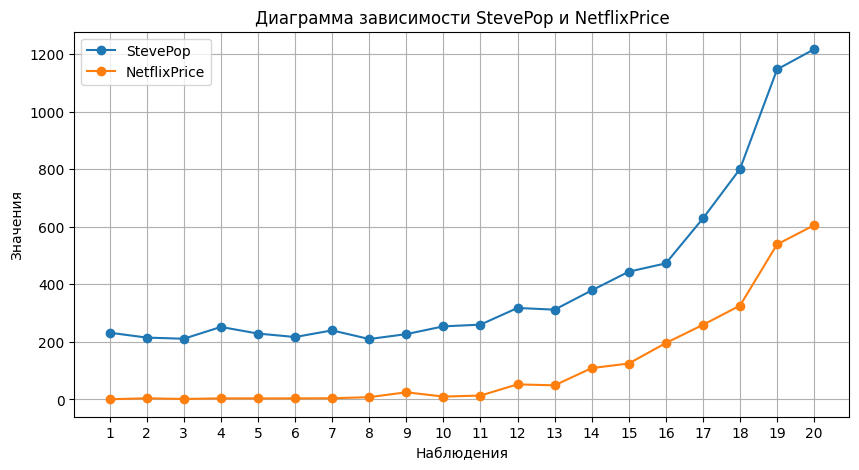

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(steve_data.index + 1, steve_data['StevePop'], label='StevePop', marker='o')
plt.plot(steve_data.index + 1, steve_data['NetflixPrice'], label='NetflixPrice', marker='o')

plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ StevePop –∏ NetflixPrice')
plt.xlabel('–ù–∞–±–ª—é–¥–µ–Ω–∏—è')
plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏—è')
plt.xticks(steve_data.index + 1)
plt.legend()
plt.grid()
plt.show()


–î–ª—è –¥–æ–±–∞–≤–ª–µ–Ω–∏–∏ –ª–∏–Ω–∏–∏ —Ç—Ä–µ–Ω–¥–∞ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∞ –≤ —Å–ª—É—á–∞–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ "–ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è - —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è" –±—É–¥–µ—Ç –æ–ø–∏—Å—ã–≤–∞—Ç—å —Ç—Ä–µ–Ω–¥

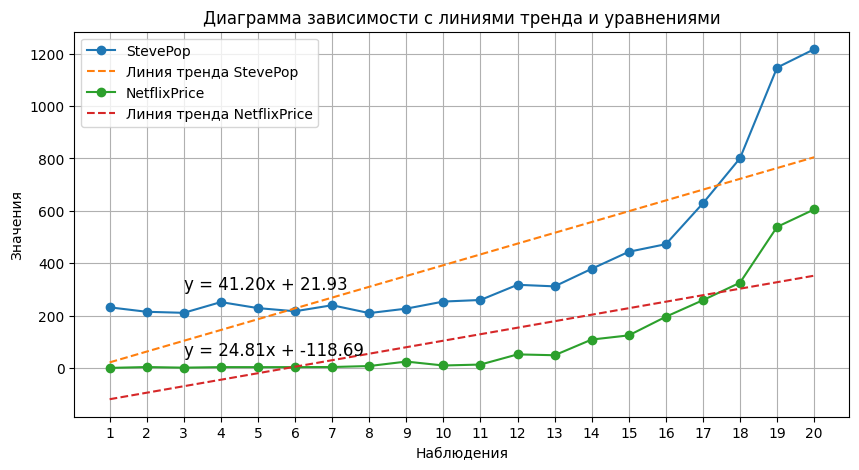

In [43]:
from sklearn.linear_model import LinearRegression

X = np.array(steve_data.index).reshape(-1, 1)  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∏–Ω–¥–µ–∫—Å –≤ 2D –º–∞—Å—Å–∏–≤
y_steve = steve_data['StevePop']
y_netflix = steve_data['NetflixPrice']

model_steve = LinearRegression().fit(X, y_steve)
steve_data['StevePopTrend'] = model_steve.predict(X)

model_netflix = LinearRegression().fit(X, y_netflix)
steve_data['NetflixPriceTrend'] = model_netflix.predict(X)

equation_steve = f'y = {model_steve.coef_[0]:.2f}x + {model_steve.intercept_:.2f}'
equation_netflix = f'y = {model_netflix.coef_[0]:.2f}x + {model_netflix.intercept_:.2f}'

plt.figure(figsize=(10, 5))
plt.plot(steve_data.index + 1, steve_data['StevePop'], label='StevePop', marker='o')
plt.plot(steve_data.index + 1, steve_data['StevePopTrend'], label='–õ–∏–Ω–∏—è —Ç—Ä–µ–Ω–¥–∞ StevePop', linestyle='--')

plt.plot(steve_data.index + 1, steve_data['NetflixPrice'], label='NetflixPrice', marker='o')
plt.plot(steve_data.index + 1, steve_data['NetflixPriceTrend'], label='–õ–∏–Ω–∏—è —Ç—Ä–µ–Ω–¥–∞ NetflixPrice', linestyle='--')

plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Å –ª–∏–Ω–∏—è–º–∏ —Ç—Ä–µ–Ω–¥–∞ –∏ —É—Ä–∞–≤–Ω–µ–Ω–∏—è–º–∏')
plt.xlabel('–ù–∞–±–ª—é–¥–µ–Ω–∏—è')
plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏—è')
plt.xticks(steve_data.index + 1)
plt.legend()
plt.text(3, 300, equation_steve, fontsize=12)
plt.text(3, 50, equation_netflix, fontsize=12)
plt.grid()
plt.show()


–û–¥–Ω–∞–∫–æ –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ–ª–∏–Ω–µ–π–Ω—É—é –º–æ–¥–µ–ª—å –¥–ª—è —Ç—Ä–µ–Ω–¥–∞ –∏ –¥–∞–ª—å–Ω–µ–π—à–∏—Ö –ø–æ–¥—Å—á–µ—Ç–æ–≤, –≤–æ–∑—å–º–µ–º –ø–æ–ª–∏–Ω–æ–º 10-–æ–π —Å—Ç–µ–ø–µ–Ω–∏

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(np.array(steve_data.index).reshape(-1, 1))

model_steve_poly = LinearRegression().fit(X_poly, steve_data['StevePop'])
steve_data['StevePopPredicted'] = model_steve_poly.predict(X_poly)

model_netflix_poly = LinearRegression().fit(X_poly, steve_data['NetflixPrice'])
steve_data['NetflixPricePredicted'] = model_netflix_poly.predict(X_poly)

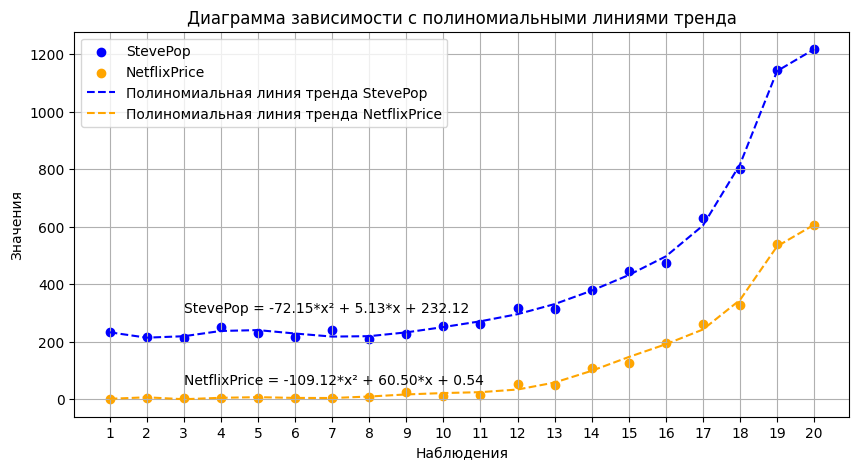

In [46]:
plt.figure(figsize=(10, 5))
plt.scatter(steve_data.index + 1, steve_data['StevePop'], label='StevePop', color='blue', marker='o')
plt.scatter(steve_data.index + 1, steve_data['NetflixPrice'], label='NetflixPrice', color='orange', marker='o')

plt.plot(steve_data.index + 1, steve_data['StevePopPredicted'], label='–ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è –ª–∏–Ω–∏—è —Ç—Ä–µ–Ω–¥–∞ StevePop', linestyle='--', color='blue')
plt.plot(steve_data.index + 1, steve_data['NetflixPricePredicted'], label='–ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è –ª–∏–Ω–∏—è —Ç—Ä–µ–Ω–¥–∞ NetflixPrice', linestyle='--', color='orange')

coeffs_steve = model_steve_poly.coef_
coeffs_netflix = model_netflix_poly.coef_

equation_steve = f'StevePop = {coeffs_steve[2]:.2f}*x¬≤ + {coeffs_steve[1]:.2f}*x + {model_steve_poly.intercept_:.2f}'
equation_netflix = f'NetflixPrice = {coeffs_netflix[2]:.2f}*x¬≤ + {coeffs_netflix[1]:.2f}*x + {model_netflix_poly.intercept_:.2f}'

plt.text(3, 300, equation_steve, fontsize=10)
plt.text(3, 50, equation_netflix, fontsize=10)

plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Å –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–º–∏ –ª–∏–Ω–∏—è–º–∏ —Ç—Ä–µ–Ω–¥–∞')
plt.xlabel('–ù–∞–±–ª—é–¥–µ–Ω–∏—è')
plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏—è')
plt.xticks(steve_data.index + 1)
plt.legend()
plt.grid()
plt.show()

### –ù–∞–π–¥–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –æ—Å—Ç–∞—Ç–∫–æ–≤

–ü–æ–¥—Å—á–∏—Ç–∞–µ–º –æ—Å—Ç–∞—Ç–∫–∏ –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä—É–µ–º –∏—Ö

In [47]:
steve_data['StevePopResiduals'] = steve_data['StevePop'] - steve_data['StevePopPredicted']
steve_data['NetflixPriceResiduals'] = steve_data['NetflixPrice'] - steve_data['NetflixPricePredicted']

steve_data['StevePopStandardizedResiduals'] = (steve_data['StevePopResiduals'] - steve_data['StevePopResiduals'].mean()) / steve_data['StevePopResiduals'].std()
steve_data['NetflixPriceStandardizedResiduals'] = (steve_data['NetflixPriceResiduals'] - steve_data['NetflixPriceResiduals'].mean()) / steve_data['NetflixPriceResiduals'].std()

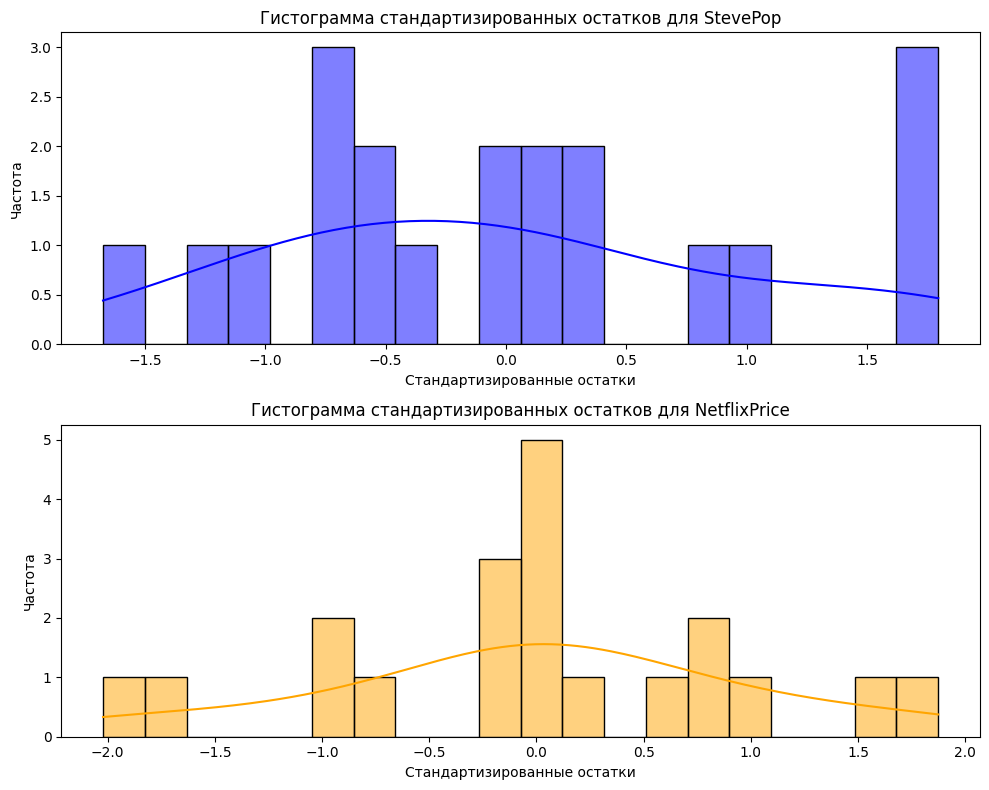

In [48]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(steve_data['StevePopStandardizedResiduals'], bins=20, kde=True, ax=axs[0], color='blue')
axs[0].set_title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –æ—Å—Ç–∞—Ç–∫–æ–≤ –¥–ª—è StevePop')
axs[0].set_xlabel('–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –æ—Å—Ç–∞—Ç–∫–∏')
axs[0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

sns.histplot(steve_data['NetflixPriceStandardizedResiduals'], bins=20, kde=True, ax=axs[1], color='orange')
axs[1].set_title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –æ—Å—Ç–∞—Ç–∫–æ–≤ –¥–ª—è NetflixPrice')
axs[1].set_xlabel('–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –æ—Å—Ç–∞—Ç–∫–∏')
axs[1].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

plt.tight_layout()
plt.show()

–ù–∞–π–¥–µ–º –∏—Ö –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é

In [49]:
correlation = round(steve_data['StevePopResiduals'].corr(steve_data['NetflixPriceResiduals']),4)
correlation

0.373

# –†–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑

## –í—ã–≤–æ–¥—ã –∏–∑ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞

In [50]:
def print_important(matrix, coef_matrix):
    for i, col1 in enumerate(matrix.columns):
        for j, col2 in enumerate(matrix.index):
            if i < j and matrix.loc[col1, col2] == '–∑–Ω–∞—á–∏–º–∞':
                print(f'–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É {col1} –∏ {col2}:\t {coef_matrix.loc[col1,col2]:.3f}')

In [51]:
print_important(correlation_matrix, spearman_corr)

–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É age –∏ trestbps:	 0.286
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É age –∏ chol:	 0.196
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É age –∏ thalach:	 -0.398
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É age –∏ target:	 -0.238
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É trestbps –∏ chol:	 0.127
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É trestbps –∏ target:	 -0.122
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É chol –∏ target:	 -0.121
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É thalach –∏ target:	 0.428


In [52]:
print_important(cramers_p_value_matrix, cramers_v_matrix)

–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É sex –∏ exang:	 0.134
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É sex –∏ target:	 0.274
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É cp –∏ exang:	 0.471
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É cp –∏ target:	 0.519
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É restecg –∏ target:	 0.182
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É exang –∏ target:	 0.430


### –î–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ–∏–≤–∞–Ω–∏—è

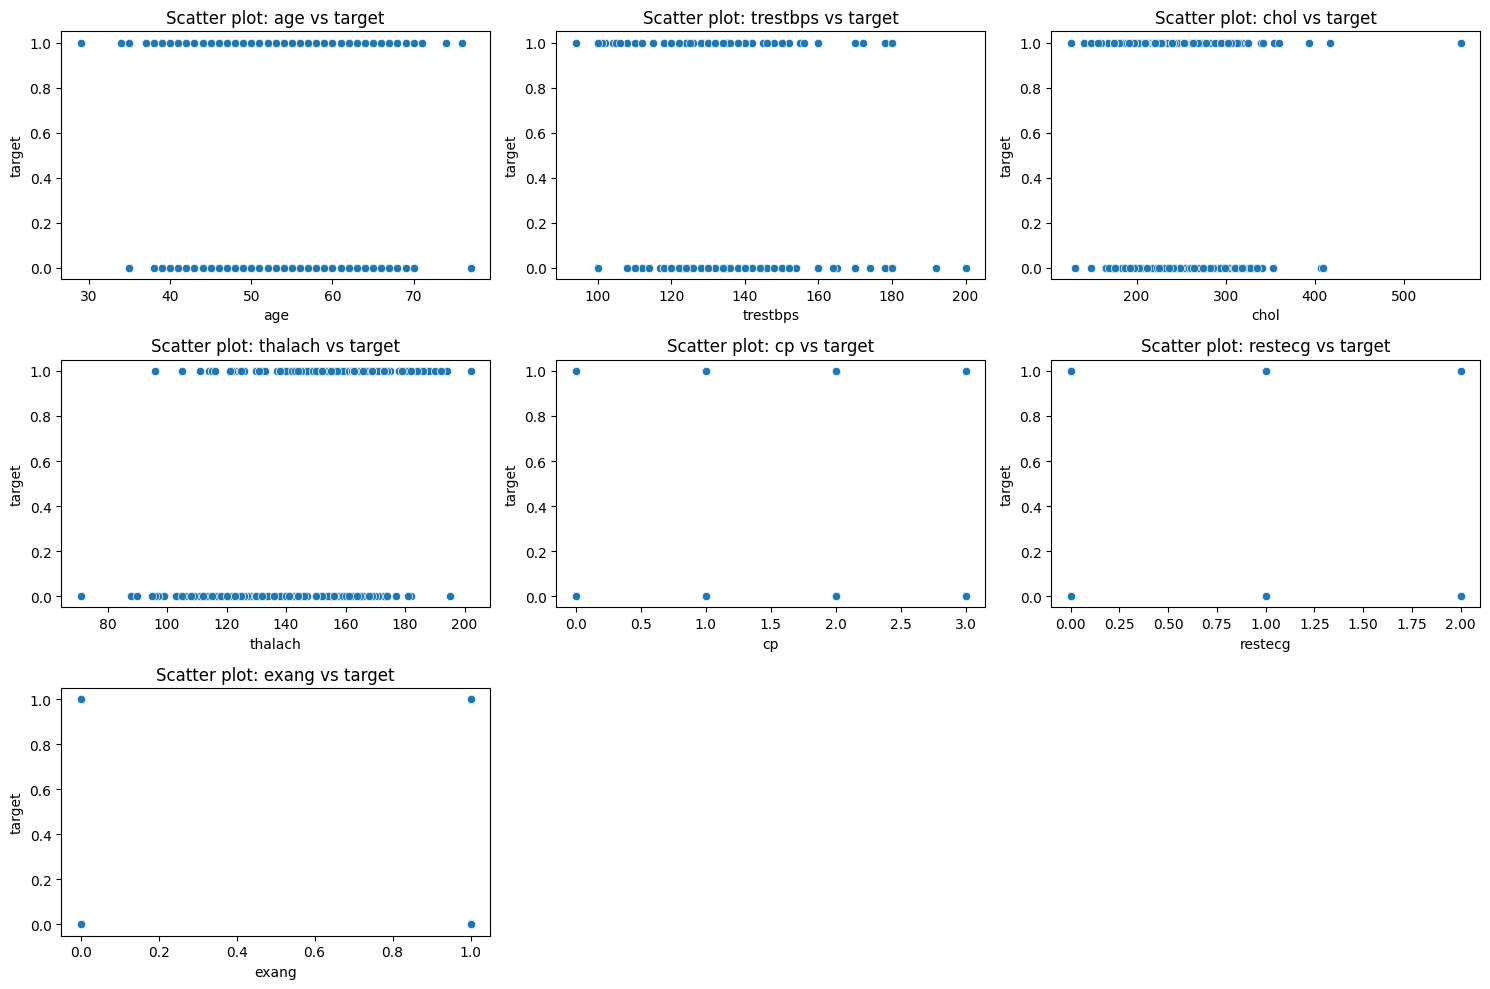

In [70]:
variables = ['age', 'trestbps', 'chol', 'thalach', 'cp', 'restecg', 'exang']

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=data[var], y=data['target'])
    plt.title(f'Scatter plot: {var} vs target')
    plt.xlabel(var)
    plt.ylabel('target')

plt.tight_layout()
plt.show()

## –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏

–ù–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –±—É–¥–µ—Ç –¥–µ–ª–∞—Ç—å —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_linear_regression(X, y):
    """
    –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏.
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    X (DataFrame): –ü—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –º–æ–¥–µ–ª–∏.
    y (Series): –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    coefficients = model.coef_
    intercept = model.intercept_

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞: {mse:.3f}')
    print(f'–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ (R^2): {r2:.3f}')

    # –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.axvline(0, color='red', linestyle='--')
    plt.title('–ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤')
    plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
    plt.ylabel('–û—Å—Ç–∞—Ç–∫–∏')
    plt.show()

    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –æ—Å—Ç–∞—Ç–∫–æ–≤
    standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
    plt.figure(figsize=(10, 6))
    sns.histplot(standardized_residuals, bins=30, kde=True)
    plt.title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –æ—Å—Ç–∞—Ç–∫–æ–≤')
    plt.xlabel('–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –æ—Å—Ç–∞—Ç–∫–∏')
    plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    plt.show()

    print(f'–£—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: target = \n{intercept:.2f} + \n{" + \n".join([f"{coef:.5f} * {name}" for coef, name in zip(coefficients, X.columns)])}')


### –¢—Ä–∏ —Å–∞–º—ã—Ö –≤—ã—Å–æ–∫–æ–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞:

–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞: 0.150
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ (R^2): 0.397


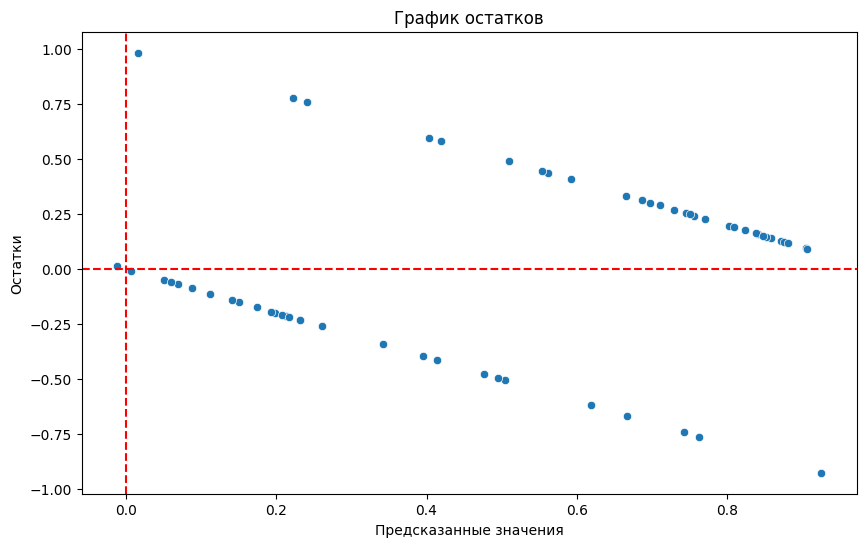

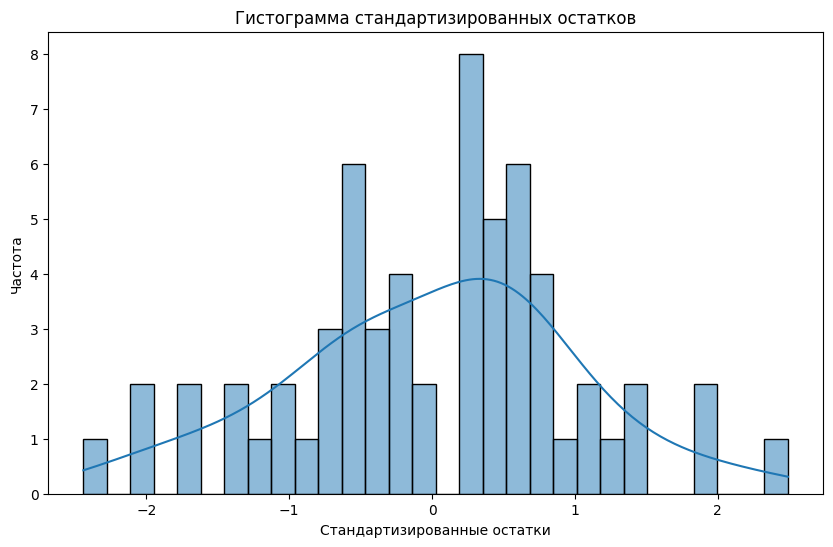

–£—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: target = 
-0.20 + 
-0.28744 * exang + 
0.12123 * cp + 
0.00478 * thalach


In [69]:
evaluate_linear_regression(data[ ['exang', 'cp', 'thalach']], data['target'])

### –ü—è—Ç—å —Å–∞–º—ã—Ö –≤–æ—Å—Ç—Ä–µ–±–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞: 0.145
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ (R^2): 0.418


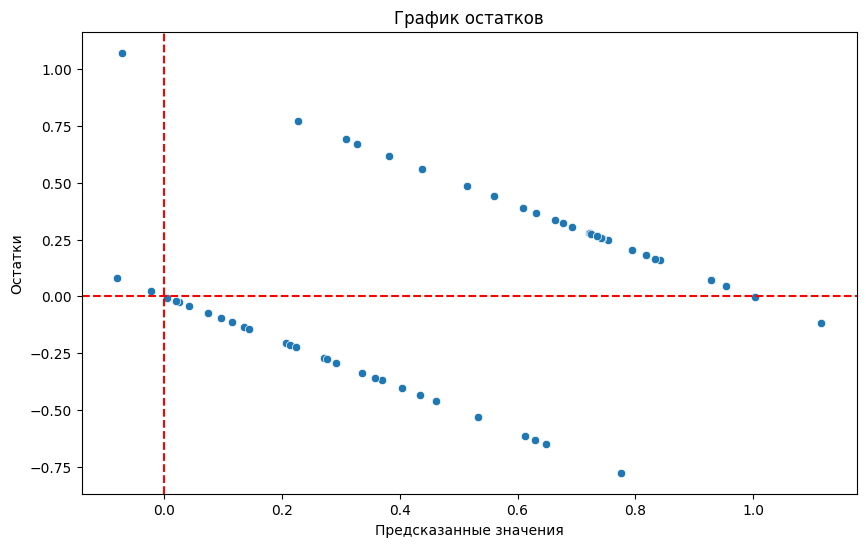

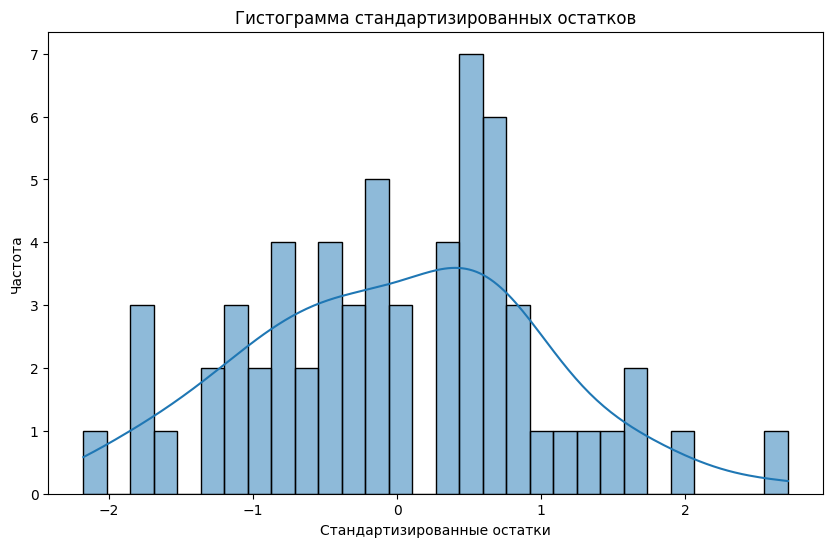

–£—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: target = 
0.52 + 
-0.24175 * exang + 
0.12215 * cp + 
0.00377 * thalach + 
-0.27836 * sex + 
-0.00725 * age


In [57]:
evaluate_linear_regression(data[ ['exang', 'cp', 'thalach', 'sex', 'age']], data['target'])

### –ê–±—Å–æ–ª—é—Ç–Ω–æ –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞: 0.132
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ (R^2): 0.469


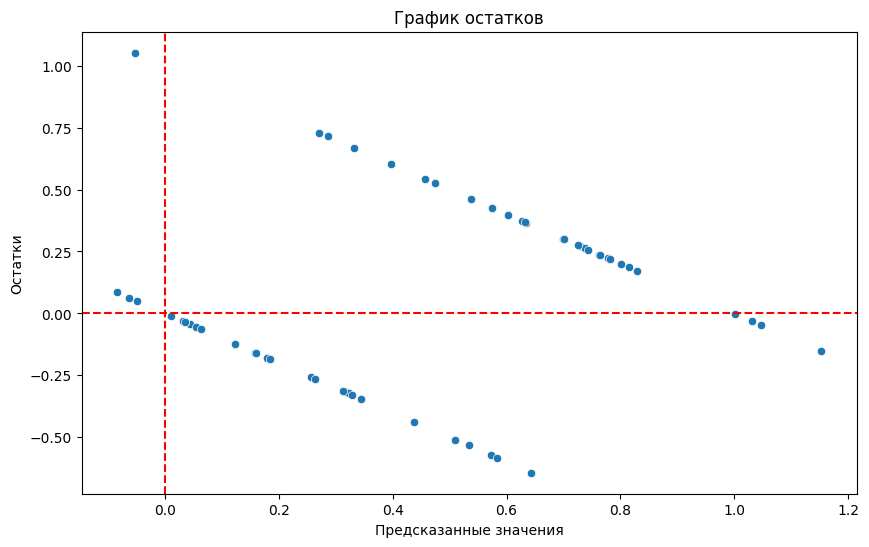

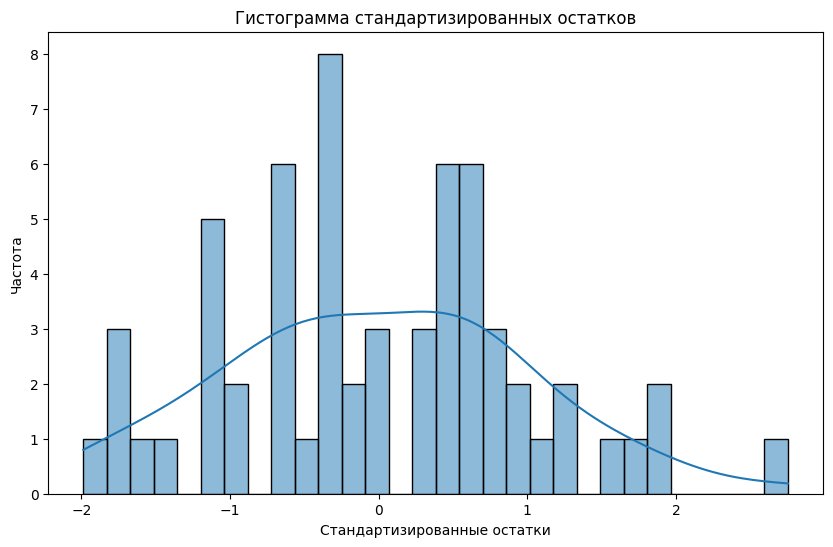

–£—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: target = 
0.75 + 
-0.00485 * age + 
-0.29267 * sex + 
0.12201 * cp + 
-0.00246 * trestbps + 
-0.00050 * chol + 
0.00807 * fbs + 
0.03507 * restecg + 
0.00418 * thalach + 
-0.23061 * exang


In [58]:
evaluate_linear_regression(data.drop(columns=['target']), data['target'])

### –ó–Ω–∞—á–∏–º–æ—Å—Ç–∏ –ø–æ–ª—É—á–∏–≤—à–∏—Ö—Å—è –º–æ–¥–µ–ª–µ–π

–î–∞–≤–∞–π –æ–±—Å—É–¥–∏–º –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –ø–æ–ª—É—á–∏–≤—à–∏—Ö—Å—è –ª–∏–Ω–µ–π–Ω—ã—Ö —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö –º–µ—Ç—Ä–∏–∫: —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE) –∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ (R¬≤).

#### –ú–æ–¥–µ–ª—å 1:
- –£—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:  
  $
  \text{target} = -0.20 - 0.28744 \cdot \text{exang} + 0.12123 \cdot \text{cp} + 0.00478 \cdot \text{thalach}
  $  
- –°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE): 0.150
- –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ (R¬≤): 0.397

–í—ã–≤–æ–¥:
- MSE: –ó–Ω–∞—á–µ–Ω–∏–µ 0.150 –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –≤ —Å—Ä–µ–¥–Ω–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ—Ç–∫–ª–æ–Ω—è—é—Ç—Å—è –æ—Ç —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –Ω–∞ 0.150. –≠—Ç–æ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–∏–µ–º–ª–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –Ω–æ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è.
- R¬≤: –ó–Ω–∞—á–µ–Ω–∏–µ 0.397 –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –ø—Ä–∏–º–µ—Ä–Ω–æ 39.7% –≤–∞—Ä–∏–∞—Ü–∏–∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (target) –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è –¥–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª—å—é. –≠—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ –º–æ–¥–µ–ª—å –∏–º–µ–µ—Ç —É–º–µ—Ä–µ–Ω–Ω—É—é –æ–±—ä—è—Å–Ω–∏—Ç–µ–ª—å–Ω—É—é —Å–∏–ª—É, –Ω–æ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è –¥–æ–ª—è –≤–∞—Ä–∏–∞—Ü–∏–∏ –æ—Å—Ç–∞–µ—Ç—Å—è –Ω–µ–æ–±—ä—è—Å–Ω–µ–Ω–Ω–æ–π.

#### –ú–æ–¥–µ–ª—å 2:
- –£—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:  
   $
  \text{target} = 0.52 - 0.24175 \cdot \text{exang} + 0.12215 \cdot \text{cp} + 0.00377 \cdot \text{thalach} - 0.27836 \cdot \text{sex} - 0.00725 \cdot \text{age}
   $  
- –°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE): 0.145
- –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ (R¬≤): 0.418

–í—ã–≤–æ–¥:
- MSE: –°–Ω–∏–∂–µ–Ω–∏–µ MSE –¥–æ 0.145 —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —É–ª—É—á—à–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ø–µ—Ä–≤–æ–π –º–æ–¥–µ–ª—å—é.
- R¬≤: –ó–Ω–∞—á–µ–Ω–∏–µ 0.418 –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ 41.8% –≤–∞—Ä–∏–∞—Ü–∏–∏ –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è –º–æ–¥–µ–ª—å—é, —á—Ç–æ –Ω–µ–º–Ω–æ–≥–æ –ª—É—á—à–µ, —á–µ–º –≤ –ø–µ—Ä–≤–æ–π –º–æ–¥–µ–ª–∏. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–º —Ç–æ–≥–æ, —á—Ç–æ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —É–ª—É—á—à–∞–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.

#### –ú–æ–¥–µ–ª—å 3:
- –£—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:  
   $
  \text{target} = 0.75 - 0.00485 \cdot \text{age} - 0.29267 \cdot \text{sex} + 0.12201 \cdot \text{cp} - 0.00246 \cdot \text{trestbps} - 0.00050 \cdot \text{chol} + 0.00807 \cdot \text{fbs} + 0.03507 \cdot \text{restecg} + 0.00418 \cdot \text{thalach} - 0.23061 \cdot \text{exang}
   $  
- –°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE): 0.132
- –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ (R¬≤): 0.469

–í—ã–≤–æ–¥:
- MSE: –ó–Ω–∞—á–µ–Ω–∏–µ 0.132 –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –¥–∞–ª—å–Ω–µ–π—à–µ–µ —É–ª—É—á—à–µ–Ω–∏–µ –≤ —Ç–æ—á–Ω–æ—Å—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ø—Ä–µ–¥—ã–¥—É—â–∏–º–∏ –º–æ–¥–µ–ª—è–º–∏.
- R¬≤: –ó–Ω–∞—á–µ–Ω–∏–µ 0.469 –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ 46.9% –≤–∞—Ä–∏–∞—Ü–∏–∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è –º–æ–¥–µ–ª—å—é. –≠—Ç–æ —É–∂–µ –¥–æ–≤–æ–ª—å–Ω–æ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ö–æ—Ä–æ—à—É—é –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω—É—é —Å–∏–ª—É –º–æ–¥–µ–ª–∏.

#### –û–±—â–∏–µ –≤—ã–≤–æ–¥—ã:
1. –°–Ω–∏–∂–µ–Ω–∏–µ MSE: –ü–æ –º–µ—Ä–µ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —É–ª—É—á—à–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏.
2. –£–≤–µ–ª–∏—á–µ–Ω–∏–µ R¬≤: –ö–∞–∂–¥–∞—è –ø–æ—Å–ª–µ–¥—É—é—â–∞—è –º–æ–¥–µ–ª—å –æ–±—ä—è—Å–Ω—è–µ—Ç –±–æ–ª—å—à—É—é –¥–æ–ª—é –≤–∞—Ä–∏–∞—Ü–∏–∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, —á—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ —Ç–æ–º, —á—Ç–æ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø–æ–º–æ–≥–∞–µ—Ç —É–ª—É—á—à–∏—Ç—å –ø–æ–Ω–∏–º–∞–Ω–∏–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –æ—Ç –¥—Ä—É–≥–∏—Ö —Ñ–∞–∫—Ç–æ—Ä–æ–≤.
3. –ó–Ω–∞—á–∏–º–æ—Å—Ç—å –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö: –í —É—Ä–∞–≤–Ω–µ–Ω–∏—è—Ö —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –º–æ–∂–Ω–æ –≤–∏–¥–µ—Ç—å, –∫–∞–∫–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –æ–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞–∏–±–æ–ª—å—à–µ–µ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é. –ù–∞–ø—Ä–∏–º–µ—Ä, –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è exang –∏–º–µ–µ—Ç –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤ –æ–±–µ–∏—Ö –º–æ–¥–µ–ª—è—Ö, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –µ–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –≤ –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

# –î–∏—Å–ø–µ—Ä—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑

## –°—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º H0 –≥–∏–ø–æ—Ç–µ–∑—É –æ–± 1 –ø–∞—Ä–∞–º–µ—Ç—Ä–µ 

In [327]:
print_important(cramers_p_value_matrix, cramers_v_matrix)
print_important(correlation_matrix, spearman_corr)

–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É sex –∏ exang:	 0.134
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É sex –∏ target:	 0.274
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É cp –∏ exang:	 0.471
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É cp –∏ target:	 0.519
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É restecg –∏ target:	 0.182
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É exang –∏ target:	 0.430
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É age –∏ trestbps:	 0.286
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É age –∏ chol:	 0.196
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É age –∏ thalach:	 -0.398
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É age –∏ target:	 -0.238
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É trestbps –∏ chol:	 0.127
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É trestbps –∏ target:	 -0.122
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É chol –∏ target:	 -0.121
–ó–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É thalach –∏ target:	 0.428


–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ cp –∏ target, —Ä–∞–≤–Ω–æ–µ 0.519.  
–≠—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —Å–∏–ª—å–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É —Ç–∏–ø–æ–º –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ (cp) –∏ –Ω–∞–ª–∏—á–∏–µ–º —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π (target).

**–ù–∞—á–∞–ª—å–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H0)**: –°—É—â–µ—Å—Ç–≤—É–µ—Ç –∑–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É —Ç–∏–ø–æ–º –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ (cp) –∏ –Ω–∞–ª–∏—á–∏–µ–º —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π (target).  
  
**–ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H1)**: –û—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –∑–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É —Ç–∏–ø–æ–º –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ (cp) –∏ –Ω–∞–ª–∏—á–∏–µ–º —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π (target).  

## –ì—Ä–∞–¥–∞—Ü–∏–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞

–ü–æ—Å–∫–æ–ª—å–∫—É —Ç–∏–ø –±–æ–ª–∏ –≤ –≥—Ä—É–¥–∏ —è–≤–ª—è–µ—Ç—Å—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –º—ã –º–æ–∂–µ–º —Ä–∞–∑–±–∏—Ç—å –∑–∞–≤–∏—Å–∏–º—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é (–Ω–∞–ª–∏—á–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π) –Ω–∞ –¥–≤–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏:

* 0: –û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è
* 1: –ù–∞–ª–∏—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è

## –û–¥–Ω–æ—Ñ–∞–∫—Ç–æ—Ä–Ω—ã–π –¥–∏—Å–ø–µ—Ä—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑

In [341]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X = data[['cp']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ
y_pred = model.predict(X_test)

print("–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –ø—Ä–µ–¥–∏–∫—Ç–æ–≤:", round(accuracy_score(y_test, y_pred),3))
print("\n–ú–∞—Ç—Ä–∏—Ü–∞ –ø—É—Ç–∞–Ω–∏—Ü—ã:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –ø—Ä–µ–¥–∏–∫—Ç–æ–≤: 0.836

–ú–∞—Ç—Ä–∏—Ü–∞ –ø—É—Ç–∞–Ω–∏—Ü—ã:
 [[26  3]
 [ 7 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### –í—ã–≤–æ–¥—ã –ø–æ –∞–Ω–∞–ª–∏–∑—É

1. Precision (—Ç–æ—á–Ω–æ—Å—Ç—å):  
–û–ø—Ä–µ–¥–µ–ª—è–µ—Ç –¥–æ–ª—é –∏—Å—Ç–∏–Ω–Ω–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ (TP) —Å—Ä–µ–¥–∏ –≤—Å–µ—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ (TP + FP).
–í—ã—Å–æ–∫–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –º–æ–¥–µ–ª—å –¥–µ–ª–∞–µ—Ç –Ω–µ–º–Ω–æ–≥–æ –ª–æ–∂–Ω—ã—Ö —Å—Ä–∞–±–∞—Ç—ã–≤–∞–Ω–∏–π.  
–î–ª—è –∫–ª–∞—Å—Å–∞ 0: 0.79 ‚Äî —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ 79% –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∫–ª–∞—Å—Å–∞ 0 –±—ã–ª–∏ –≤–µ—Ä–Ω—ã–º–∏.  
–î–ª—è –∫–ª–∞—Å—Å–∞ 1: 0.89 ‚Äî 89% –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∫–ª–∞—Å—Å–∞ 1 –±—ã–ª–∏ –≤–µ—Ä–Ω—ã–º–∏.  

2. Recall (–ø–æ–ª–Ω–æ—Ç–∞):  
–û–ø—Ä–µ–¥–µ–ª—è–µ—Ç –¥–æ–ª—é –∏—Å—Ç–∏–Ω–Ω–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Å—Ä–µ–¥–∏ –≤—Å–µ—Ö —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Å–ª—É—á–∞–µ–≤ (TP + FN).  
–í—ã—Å–æ–∫–∞—è –ø–æ–ª–Ω–æ—Ç–∞ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ –º–æ–¥–µ–ª—å —Ö–æ—Ä–æ—à–æ –Ω–∞—Ö–æ–¥–∏—Ç –≤—Å–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ —Å–ª—É—á–∞–∏.  
–î–ª—è –∫–ª–∞—Å—Å–∞ 0: 0.90 ‚Äî 90% –≤—Å–µ—Ö —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Å–ª—É—á–∞–µ–≤ –∫–ª–∞—Å—Å–∞ 0 –±—ã–ª–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω—ã.  
–î–ª—è –∫–ª–∞—Å—Å–∞ 1: 0.78 ‚Äî 78% —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö —Å–ª—É—á–∞–µ–≤ –∫–ª–∞—Å—Å–∞ 1 –±—ã–ª–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω—ã.  

3. F1-Score:  
–≠—Ç–æ —Å—Ä–µ–¥–Ω—è—è –≥–∞—Ä–º–æ–Ω–∏—á–µ—Å–∫–∞—è —Ç–æ—á–Ω–æ—Å—Ç–∏ –∏ –ø–æ–ª–Ω–æ—Ç—ã. –≠—Ç–æ –ø–æ–ª–µ–∑–Ω–æ, –∫–æ–≥–¥–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –Ω–∞–π—Ç–∏ –±–∞–ª–∞–Ω—Å –º–µ–∂–¥—É —Ç–æ—á–Ω–æ—Å—Ç—å—é –∏ –ø–æ–ª–Ω–æ—Ç–æ–π.  
F1-Score –¥–ª—è –∫–ª–∞—Å—Å–∞ 0: 0.84.  
F1-Score –¥–ª—è –∫–ª–∞—Å—Å–∞ 1: 0.83.  

4. Support:  
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö —Å–ª—É—á–∞–µ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ –≤ –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö.  
–î–ª—è –∫–ª–∞—Å—Å–∞ 0: 29.  
–î–ª—è –∫–ª–∞—Å—Å–∞ 1: 32.  

5. Accuracy (—Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏):  
–û–±—â–∞—è –¥–æ–ª—è –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (–∏—Å—Ç–∏–Ω–Ω–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –∏ –∏—Å—Ç–∏–Ω–Ω–æ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ) —Å—Ä–µ–¥–∏ –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π.  
–í –≤–∞—à–µ–º —Å–ª—É—á–∞–µ —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 0.84 (–∏–ª–∏ 84%).  

6. Macro Average:  
–°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤ (–±–µ–∑ —É—á–µ—Ç–∞ –∏—Ö –ø–æ–¥–¥–µ—Ä–∂–∫–∏). –í –≤–∞—à–µ–º —Å–ª—É—á–∞–µ –≤—Å–µ –º–µ—Ç—Ä–∏–∫–∏ —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç 0.84.  

7. Weighted Average:  
–°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤, –≤–∑–≤–µ—à–µ–Ω–Ω—ã–µ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —ç–∫–∑–µ–º–ø–ª—è—Ä–æ–≤ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞. –≠—Ç–æ —Ç–∞–∫–∂–µ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 0.84.  

## –î–≤—É—Ö—Ñ–∞–∫—Ç–æ—Ä–Ω—ã–π –¥–∏—Å–ø–µ—Ä—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑

In [346]:
data_dummies = data[['sex', 'cp']]

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("–ú–∞—Ç—Ä–∏—Ü–∞ –ø—É—Ç–∞–Ω–∏—Ü—ã:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


–ú–∞—Ç—Ä–∏—Ü–∞ –ø—É—Ç–∞–Ω–∏—Ü—ã:
[[32  9]
 [ 9 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## –í—ã–≤–æ–¥—ã –æ –≥–∏–ø–æ—Ç–µ–∑–∞—Ö

**–ù–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –≤—ã–≤–æ–¥—ã –æ –≤—ã–¥–≤–∏–Ω—É—Ç—ã—Ö –≥–∏–ø–æ—Ç–µ–∑–∞—Ö:**

1. –ì–∏–ø–æ—Ç–µ–∑–∞ –æ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π:  
–ü—Ä–æ–≤–µ–¥–µ–Ω–Ω—ã–µ –æ–¥–Ω–æ—Ñ–∞–∫—Ç–æ—Ä–Ω—ã–π –∏ –¥–≤—É—Ö—Ñ–∞–∫—Ç–æ—Ä–Ω—ã–π –∞–Ω–∞–ª–∏–∑—ã, –∞ —Ç–∞–∫–∂–µ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∏ –Ω–∞–ª–∏—á–∏–µ –∑–Ω–∞—á–∏–º—ã—Ö –≤–∑–∞–∏–º–æ—Å–≤—è–∑–µ–π –º–µ–∂–¥—É –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, sex, cp, thalach, exang) –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π target.  
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ —Ç–æ, —á—Ç–æ –∏–∑–º–µ–Ω–µ–Ω–∏—è –≤ —ç—Ç–∏—Ö —Ñ–∞–∫—Ç–æ—Ä–∞—Ö –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –≤–ª–∏—è—é—Ç –Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å–æ—Å—Ç–æ—è–Ω–∏–π (–Ω–∞–ø—Ä–∏–º–µ—Ä, –Ω–∞–ª–∏—á–∏–µ –∏–ª–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π).
–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –≥–∏–ø–æ—Ç–µ–∑–∞ –æ —Ç–æ–º, —á—Ç–æ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∏–º–µ—é—Ç –≤–ª–∏—è–Ω–∏–µ –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é, –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è.  

2. –ì–∏–ø–æ—Ç–µ–∑–∞ –æ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏:  
–ü–æ–ª—É—á–µ–Ω–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏, —Ç–∞–∫–∏–µ –∫–∞–∫ —Ç–æ—á–Ω–æ—Å—Ç—å (accuracy), —Ç–æ—á–Ω–æ—Å—Ç—å (precision), –ø–æ–ª–Ω–æ—Ç–∞ (recall) –∏ F1-score, –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç, —á—Ç–æ –º–æ–¥–µ–ª–∏, –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ –Ω–∞ –æ—Å–Ω–æ–≤–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –¥–∞—é—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è, —É–∫–∞–∑—ã–≤–∞—é—â–∏–µ –Ω–∞ —Ö–æ—Ä–æ—à—É—é –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å.  
–ü–æ—Å–∫–æ–ª—å–∫—É —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 80%, –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –≥–∏–ø–æ—Ç–µ–∑–∞ –æ —Ç–æ–º, —á—Ç–æ –º–æ–¥–µ–ª—å —Å–º–æ–∂–µ—Ç –∞–¥–µ–∫–≤–∞—Ç–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –Ω–∞ –æ—Å–Ω–æ–≤–µ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, —Ç–∞–∫–∂–µ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è.  

3. –ì–∏–ø–æ—Ç–µ–∑–∞ –æ –≤–ª–∏—è–Ω–∏–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:  
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–¥–Ω–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–æ–≥–æ –∏ –¥–≤—É—Ö—Ñ–∞–∫—Ç–æ—Ä–Ω–æ–≥–æ –¥–∏—Å–ø–µ—Ä—Å–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ —Ç–∞–∫–∂–µ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∏, —á—Ç–æ —Ç–∞–∫–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, –∫–∞–∫ sex –∏ cp, –∏–º–µ—é—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é.
–≠—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ç–æ–º, —á—Ç–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ —Ñ–∞–∫—Ç–æ—Ä—ã –º–æ–≥—É—Ç —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –≤–ª–∏—è—Ç—å –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏ –¥–æ–ª–∂–Ω—ã —É—á–∏—Ç—ã–≤–∞—Ç—å—Å—è –≤ –º–æ–¥–µ–ª—è—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.  

4. –ì–∏–ø–æ—Ç–µ–∑–∞ –æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –¥–∞–ª—å–Ω–µ–π—à–∏—Ö –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–π:  
–ù–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —Ç–æ —á—Ç–æ –≥–∏–ø–æ—Ç–µ–∑—ã –æ –≤–ª–∏—è–Ω–∏–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –±—ã–ª–∏ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω—ã, —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞ —Ç–∞–∫–∂–µ –ø–æ–∫–∞–∑–∞–ª–∏ –æ–±–ª–∞—Å—Ç–∏, –≥–¥–µ –º–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å –º–æ–¥–µ–ª—å. –ù–∞–ø—Ä–∏–º–µ—Ä, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–æ–∂–Ω—ã—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –∏ –ª–æ–∂–Ω—ã—Ö –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–π –∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –º–æ–¥–µ–ª–∏ –¥–ª—è –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è –µ—â–µ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏.  